In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../data/av-10-21.csv')
av_df = pd.DataFrame(data = df)
av_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  6688 non-null   object 
 1   ID      6688 non-null   object 
 2   AV      6686 non-null   float64
 3   From    6688 non-null   int64  
 4   To      6688 non-null   int64  
 5   G       6688 non-null   int64  
 6   GS      6688 non-null   int64  
 7   Pos     6580 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 418.1+ KB


In [3]:
av_df.head()

,Player,ID,AV,From,To,G,GS,Pos
0,Tom Brady,BradTo00,195.0,2010,2021,189,189,QB
1,Aaron Rodgers,RodgAa00,183.0,2010,2021,174,174,QB
2,Matt Ryan,RyanMa00,179.0,2010,2021,192,192,QB
3,Drew Brees,BreeDr00,166.0,2010,2020,165,165,QB
4,Russell Wilson,WilsRu00,158.0,2012,2021,158,158,QB


In [4]:
df2 = pd.read_csv('../data/undrafted-rookie-info.csv')
undrafted_df = pd.DataFrame(data = df2)
undrafted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1942 non-null   object 
 1   ID      1942 non-null   object 
 2   AV      1939 non-null   float64
 3   From    1942 non-null   int64  
 4   To      1942 non-null   int64  
 5   Age     1942 non-null   int64  
 6   G       1942 non-null   int64  
 7   GS      1942 non-null   int64  
 8   AV.1    1939 non-null   float64
 9   Pos     1897 non-null   object 
 10  Team    1942 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 167.0+ KB


In [5]:
undrafted_df.head()

,Player,ID,AV,From,To,Age,G,GS,AV.1,Pos,Team
0,Vontaze Burfict,BurfVo00,8.0,2012,2012,22,16,14,8.0,RLB,CIN
1,James Robinson,RobiJa00,8.0,2020,2020,22,14,14,8.0,RB,JAX
2,Willie Snead,SneaWi00,8.0,2015,2015,23,15,8,8.0,WR,NOR
3,Terence Steele,SteeTe01,8.0,2020,2020,23,16,14,8.0,RT,DAL
4,David Andrews,AndrDa00,7.0,2015,2015,23,14,11,7.0,C,NWE


In [6]:
df3 = pd.read_csv('../data/draft-10-21.csv', encoding = 'latin-1')
drafted_df = pd.DataFrame(data = df3)
drafted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       3058 non-null   int64  
 1   Rnd        3058 non-null   int64  
 2   Pick       3058 non-null   int64  
 3   Player     3058 non-null   object 
 4   ID         3047 non-null   object 
 5   Pos        3058 non-null   object 
 6   DrAge      3039 non-null   float64
 7   Tm         3058 non-null   object 
 8   Yr_From    3058 non-null   int64  
 9   Yr_To      3058 non-null   int64  
 10  AP1        3058 non-null   int64  
 11  PB         3058 non-null   int64  
 12  Yrs_Strtd  3058 non-null   int64  
 13  wAV        2812 non-null   float64
 14  G          2812 non-null   float64
 15  GS         2813 non-null   object 
 16  College    3046 non-null   object 
dtypes: float64(3), int64(8), object(6)
memory usage: 406.3+ KB


In [7]:
drafted_df.head()

,Year,Rnd,Pick,Player,ID,Pos,DrAge,Tm,Yr_From,Yr_To,AP1,PB,Yrs_Strtd,wAV,G,GS,College
0,2021,1,1,Trevor Lawrence,LawrTr00,QB,21.0,JAX,2021,2021,0,0,1,7.0,17.0,17,Clemson
1,2021,1,2,Zach Wilson,WilsZa00,QB,22.0,NYJ,2021,2021,0,0,1,5.0,13.0,13,BYU
2,2021,1,3,Trey Lance,LancTr00,QB,21.0,SFO,2021,2021,0,0,0,3.0,6.0,2,North Dakota St.
3,2021,1,4,Kyle Pitts,PittKy00,TE,20.0,ATL,2021,2021,0,1,1,8.0,17.0,15,Florida
4,2021,1,5,Ja'Marr Chase,ChasJa00,WR,21.0,CIN,2021,2021,0,1,1,13.0,17.0,17,LSU


# Let's start to ask some general questions to get you started

1) Calculate AV by draft round over the last 10 years (AV per year?)(might need to look into wAV)
- break it down by position and maybe college/age

2) Try to find if there is a certain pick cutoff where the ensuing player AV's start to really fall off in the draft
- breakdown by position

In [8]:
# need to join the drafted and undrafted dfs with the av df to analyze each separately

In [9]:
# first I need to reorder columns according to the keys that I want to join on

drafted_df = drafted_df[['Player', 'ID', 'Pos', 'DrAge', 'College', 'Tm', 'Year', 'Rnd', 'Pick', 'Yr_From', 'Yr_To', 'Yrs_Strtd', 'wAV', 'G', 'GS']]
drafted_df.head()

,Player,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,Yrs_Strtd,wAV,G,GS
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,1,7.0,17.0,17
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,1,5.0,13.0,13
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,0,3.0,6.0,2
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,1,8.0,17.0,15
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,1,13.0,17.0,17


In [10]:
# simplify av df for joins

av_df2 = av_df.loc[:, ['Player', 'ID', 'AV']]
av_df2.head()

,Player,ID,AV
0,Tom Brady,BradTo00,195.0
1,Aaron Rodgers,RodgAa00,183.0
2,Matt Ryan,RyanMa00,179.0
3,Drew Brees,BreeDr00,166.0
4,Russell Wilson,WilsRu00,158.0


In [11]:
drafted_av_df = pd.merge(drafted_df, av_df2, how='left', on='ID')
drafted_av_df

,Player_x,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,Yrs_Strtd,wAV,G,GS,Player_y,AV
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,1,7.0,17.0,17,Trevor Lawrence,7.0
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,1,5.0,13.0,13,Zach Wilson,5.0
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,0,3.0,6.0,2,Trey Lance,3.0
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,1,8.0,17.0,15,Kyle Pitts,8.0
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,1,13.0,17.0,17,Ja'Marr Chase,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,1,10.0,55.0,20,Stevie Brown,10.0
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,0,5.0,55.0,0,Austin Spitler,5.0
3055,Erik Lorig,LoriEr99,DE,23.0,Stanford,TAM,2010,7,253,2010,2014,1,2.0,66.0,30,Erik Lorig,2.0
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,0,3.0,39.0,1,Josh Hull,3.0


In [12]:
#drop the name duplicate column
drafted_av_df = drafted_av_df.drop(columns = ['Player_y'])
drafted_av_df.head()

,Player_x,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,Yrs_Strtd,wAV,G,GS,AV
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,1,7.0,17.0,17,7.0
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,1,5.0,13.0,13,5.0
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,0,3.0,6.0,2,3.0
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,1,8.0,17.0,15,8.0
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,1,13.0,17.0,17,13.0


In [13]:
drafted_av_df = drafted_av_df.rename(columns = {'Player_x': 'Name', 'wAV': 'AV_Rookie', 'AV': 'AV_Career'})
drafted_av_df.head()

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,Yrs_Strtd,AV_Rookie,G,GS,AV_Career
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,1,7.0,17.0,17,7.0
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,1,5.0,13.0,13,5.0
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,0,3.0,6.0,2,3.0
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,1,8.0,17.0,15,8.0
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,1,13.0,17.0,17,13.0


In [14]:
drafted_av_df = drafted_av_df[['Name', 'ID', 'Pos', 'DrAge', 'College', 'Tm', 'Year', 'Rnd', 'Pick', 'Yr_From', 'Yr_To', 'AV_Rookie', 'AV_Career', 'G', 'GS', 'Yrs_Strtd']]
drafted_av_df.head()

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1


In [15]:
undrafted_df = undrafted_df.drop(columns = ['AV.1', 'To'])
undrafted_df.head()

,Player,ID,AV,From,Age,G,GS,Pos,Team
0,Vontaze Burfict,BurfVo00,8.0,2012,22,16,14,RLB,CIN
1,James Robinson,RobiJa00,8.0,2020,22,14,14,RB,JAX
2,Willie Snead,SneaWi00,8.0,2015,23,15,8,WR,NOR
3,Terence Steele,SteeTe01,8.0,2020,23,16,14,RT,DAL
4,David Andrews,AndrDa00,7.0,2015,23,14,11,C,NWE


In [16]:
undrafted_df = undrafted_df.rename(columns = {'From': 'Year1'})
undrafted_df.head()

,Player,ID,AV,Year1,Age,G,GS,Pos,Team
0,Vontaze Burfict,BurfVo00,8.0,2012,22,16,14,RLB,CIN
1,James Robinson,RobiJa00,8.0,2020,22,14,14,RB,JAX
2,Willie Snead,SneaWi00,8.0,2015,23,15,8,WR,NOR
3,Terence Steele,SteeTe01,8.0,2020,23,16,14,RT,DAL
4,David Andrews,AndrDa00,7.0,2015,23,14,11,C,NWE


In [17]:
undrafted_av_df = pd.merge(undrafted_df, av_df, how = 'inner', on = 'ID')
undrafted_av_df.head()

,Player_x,ID,AV_x,Year1,Age,G_x,GS_x,Pos_x,Team,Player_y,AV_y,From,To,G_y,GS_y,Pos_y
0,Vontaze Burfict,BurfVo00,8.0,2012,22,16,14,RLB,CIN,Vontaze Burfict,51.0,2012,2019,79,77,RLB
1,James Robinson,RobiJa00,8.0,2020,22,14,14,RB,JAX,James Robinson,13.0,2020,2021,28,27,RB
2,Willie Snead,SneaWi00,8.0,2015,23,15,8,WR,NOR,Willie Snead,32.0,2015,2021,95,48,WR
3,Terence Steele,SteeTe01,8.0,2020,23,16,14,RT,DAL,Terence Steele,15.0,2020,2021,32,27,RTLT
4,David Andrews,AndrDa00,7.0,2015,23,14,11,C,NWE,David Andrews,44.0,2015,2021,89,86,C


In [18]:
undrafted_av_df = undrafted_av_df.drop(columns = ['Player_y', 'From', 'Pos_y'])
undrafted_av_df = undrafted_av_df.rename(columns = {'Player_x': 'Name', 'AV_x': 'AV_Rookie', 'G_x': 'G_Rookie', 'GS_x': 'GS_Rookie', 'Pos_x': 'Pos', 'AV_y': 'AV_Career', 'To': 'Yr_End', 'G_y': 'G_Career', 'GS_y': 'GS_Career'})
undrafted_av_df.head()

,Name,ID,AV_Rookie,Year1,Age,G_Rookie,GS_Rookie,Pos,Team,AV_Career,Yr_End,G_Career,GS_Career
0,Vontaze Burfict,BurfVo00,8.0,2012,22,16,14,RLB,CIN,51.0,2019,79,77
1,James Robinson,RobiJa00,8.0,2020,22,14,14,RB,JAX,13.0,2021,28,27
2,Willie Snead,SneaWi00,8.0,2015,23,15,8,WR,NOR,32.0,2021,95,48
3,Terence Steele,SteeTe01,8.0,2020,23,16,14,RT,DAL,15.0,2021,32,27
4,David Andrews,AndrDa00,7.0,2015,23,14,11,C,NWE,44.0,2021,89,86


In [19]:
undrafted_av_df = undrafted_av_df[['Name', 'ID', 'Year1', 'Pos', 'Age', 'Team', 'Yr_End', 'AV_Rookie', 'AV_Career', 'G_Rookie', 'GS_Rookie', 'G_Career', 'GS_Career']]
undrafted_av_df.head()

,Name,ID,Year1,Pos,Age,Team,Yr_End,AV_Rookie,AV_Career,G_Rookie,GS_Rookie,G_Career,GS_Career
0,Vontaze Burfict,BurfVo00,2012,RLB,22,CIN,2019,8.0,51.0,16,14,79,77
1,James Robinson,RobiJa00,2020,RB,22,JAX,2021,8.0,13.0,14,14,28,27
2,Willie Snead,SneaWi00,2015,WR,23,NOR,2021,8.0,32.0,15,8,95,48
3,Terence Steele,SteeTe01,2020,RT,23,DAL,2021,8.0,15.0,16,14,32,27
4,David Andrews,AndrDa00,2015,C,23,NWE,2021,7.0,44.0,14,11,89,86


In [20]:
## writing both dataframes to csv to load to postgres

from pathlib import Path

#filepath = Path('out.csv')
#filepath.parent.mkdir(parents = True, exist_ok = True)
#undrafted_av_df.to_csv(filepath)

In [21]:
#drafted_av_df.to_csv(filepath)

In [22]:
drafted_av_df.head()

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1


In [23]:
##need to join salary info with undrafted df

%run salary_df.ipynb

salary_df.head()

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3248409848.py:1: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1 of the file salary_ed_scrape.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BS(response.text)


['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      2364 non-null   object 
 1   Team                        2364 non-null   object 
 2   Year Signed                 2364 non-null   object 
 3   Years                       2364 non-null   object 
 4   Value                       2364 non-null   float64
 5   APY                         2364 non-null   float64
 6   Guaranteed                  2364 non-null   float64
 7   APY as % Of Cap At Signing  2364 non-null   float64
 8   Inflated Value              2364 non-null   float64
 9   Inflated APY                2364 non-null   float64
 10  Inflated Guaranteed         2364

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2594201083.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_ed['Value'] = salary_ed['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2594201083.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_ed['APY'] = salary_ed['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2594201083.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_ed['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1151 non-null   object 
 1   Team                        1151 non-null   object 
 2   Year Signed                 1151 non-null   object 
 3   Years                       1151 non-null   object 
 4   Value                       1151 non-null   float64
 5   APY                         1151 non-null   float64
 6   Guaranteed                  1151 non-null   float64
 7   APY as % Of Cap At Signing  1151 non-null   float64
 8   Inflated Value              1151 non-null   float64
 9   Inflated APY                1151 non-null   float64
 10  Inflated Guaranteed         1151

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3778771598.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rg['Value'] = salary_rg['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3778771598.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rg['APY'] = salary_rg['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3778771598.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rg['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      370 non-null    object 
 1   Team                        370 non-null    object 
 2   Year Signed                 370 non-null    object 
 3   Years                       370 non-null    object 
 4   Value                       370 non-null    float64
 5   APY                         370 non-null    float64
 6   Guaranteed                  370 non-null    float64
 7   APY as % Of Cap At Signing  370 non-null    float64
 8   Inflated Value              370 non-null    float64
 9   Inflated APY                370 non-null    float64
 10  Inflated Guaranteed         370 no

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2067515418.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_p['Value'] = salary_p['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2067515418.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_p['APY'] = salary_p['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2067515418.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_p['Guaranteed'] = sal

Number of tables on site:  1
['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      289 non-null    object 
 1   Team                        289 non-null    object 
 2   Year Signed                 289 non-null    object 
 3   Years                       289 non-null    object 
 4   Value                       289 non-null    float64
 5   APY                         289 non-null    float64
 6   Guaranteed                  289 non-null    float64
 7   APY as % Of Cap At Signing  289 non-null    float64
 8   Inflated Value              289 non-null    float64
 9   Inflated APY                289 non-null    float64
 10  Infla

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2905604314.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_fb['Value'] = salary_fb['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2905604314.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_fb['APY'] = salary_fb['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2905604314.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_fb['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      2163 non-null   object 
 1   Team                        2163 non-null   object 
 2   Year Signed                 2163 non-null   object 
 3   Years                       2163 non-null   object 
 4   Value                       2163 non-null   float64
 5   APY                         2163 non-null   float64
 6   Guaranteed                  2163 non-null   float64
 7   APY as % Of Cap At Signing  2163 non-null   float64
 8   Inflated Value              2163 non-null   float64
 9   Inflated APY                2163 non-null   float64
 10  Inflated Guaranteed         2163

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3542297300.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_te['Value'] = salary_te['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3542297300.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_te['APY'] = salary_te['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3542297300.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_te['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1121 non-null   object 
 1   Team                        1121 non-null   object 
 2   Year Signed                 1121 non-null   object 
 3   Years                       1121 non-null   object 
 4   Value                       1121 non-null   float64
 5   APY                         1121 non-null   float64
 6   Guaranteed                  1121 non-null   float64
 7   APY as % Of Cap At Signing  1121 non-null   float64
 8   Inflated Value              1121 non-null   float64
 9   Inflated APY                1121 non-null   float64
 10  Inflated Guaranteed         1121

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3387571986.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rt['Value'] = salary_rt['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3387571986.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rt['APY'] = salary_rt['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3387571986.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rt['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      985 non-null    object 
 1   Team                        985 non-null    object 
 2   Year Signed                 985 non-null    object 
 3   Years                       985 non-null    object 
 4   Value                       985 non-null    float64
 5   APY                         985 non-null    float64
 6   Guaranteed                  985 non-null    float64
 7   APY as % Of Cap At Signing  985 non-null    float64
 8   Inflated Value              985 non-null    float64
 9   Inflated APY                985 non-null    float64
 10  Inflated Guaranteed         985 no

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1469003469.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_c['Value'] = salary_c['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1469003469.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_c['APY'] = salary_c['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1469003469.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_c['Guaranteed'] = sal

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1541422046.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lb['Value'] = salary_lb['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1541422046.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lb['APY'] = salary_lb['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1541422046.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lb['Guaranteed'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      3104 non-null   object 
 1   Team                        3104 non-null   object 
 2   Year Signed                 3104 non-null   object 
 3   Years                       3104 non-null   object 
 4   Value                       3104 non-null   float64
 5   APY                         3104 non-null   float64
 6   Guaranteed                  3104 non-null   float64
 7   APY as % Of Cap At Signing  3104 non-null   float64
 8   Inflated Value              3104 non-null   float64
 9   Inflated APY                3104 non-null   float64
 10  Inflated Guaranteed         3104 non-null   float64
dtypes: float64(7), object(4)
memory usage: 266.9+ KB


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3248409848.py:1: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1 of the file salary_dl_scrape.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BS(response.text)


['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1253660438.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_dl['Value'] = salary_dl['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1253660438.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_dl['APY'] = salary_dl['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1253660438.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_dl['Guaranteed'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      3100 non-null   object 
 1   Team                        3100 non-null   object 
 2   Year Signed                 3100 non-null   object 
 3   Years                       3100 non-null   object 
 4   Value                       3100 non-null   float64
 5   APY                         3100 non-null   float64
 6   Guaranteed                  3100 non-null   float64
 7   APY as % Of Cap At Signing  3100 non-null   float64
 8   Inflated Value              3100 non-null   float64
 9   Inflated APY                3100 non-null   float64
 10  Inflated Guaranteed         3100 non-null   float64
dtypes: float64(7), object(4)
memory usage: 266.5+ KB


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3174096887.py:1: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1 of the file salary_wr_scrape.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BS(response.text)


Number of tables on site:  1
['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1826920773.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_wr['Value'] = salary_wr['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1826920773.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_wr['APY'] = salary_wr['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1826920773.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_wr['Guaranteed'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      4501 non-null   object 
 1   Team                        4501 non-null   object 
 2   Year Signed                 4501 non-null   object 
 3   Years                       4501 non-null   object 
 4   Value                       4501 non-null   float64
 5   APY                         4501 non-null   float64
 6   Guaranteed                  4501 non-null   float64
 7   APY as % Of Cap At Signing  4501 non-null   float64
 8   Inflated Value              4501 non-null   float64
 9   Inflated APY                4501 non-null   float64
 10  Inflated Guaranteed         4501 non-null   float64
dtypes: float64(7), object(4)
memory usage: 386.9+ KB


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3248409848.py:1: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1 of the file salary_lg_scrape.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BS(response.text)


['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1149 non-null   object 
 1   Team                        1149 non-null   object 
 2   Year Signed                 1149 non-null   object 
 3   Years                       1149 non-null   object 
 4   Value                       1149 non-null   float64
 5   APY                         1149 non-null   float64
 6   Guaranteed                  1149 non-null   float64
 7   APY as % Of Cap At Signing  1149 non-null   float64
 8   Inflated Value              1149 non-null   float64
 9   Inflated APY                1149 non-null   float64
 10  Inflated Guaranteed         1149

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2370105543.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lg['Value'] = salary_lg['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2370105543.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lg['APY'] = salary_lg['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2370105543.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lg['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1077 non-null   object 
 1   Team                        1077 non-null   object 
 2   Year Signed                 1077 non-null   object 
 3   Years                       1077 non-null   object 
 4   Value                       1077 non-null   float64
 5   APY                         1077 non-null   float64
 6   Guaranteed                  1077 non-null   float64
 7   APY as % Of Cap At Signing  1077 non-null   float64
 8   Inflated Value              1077 non-null   float64
 9   Inflated APY                1077 non-null   float64
 10  Inflated Guaranteed         1077

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2660327268.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lt['Value'] = salary_lt['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2660327268.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lt['APY'] = salary_lt['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2660327268.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_lt['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      316 non-null    object 
 1   Team                        316 non-null    object 
 2   Year Signed                 316 non-null    object 
 3   Years                       316 non-null    object 
 4   Value                       316 non-null    float64
 5   APY                         316 non-null    float64
 6   Guaranteed                  316 non-null    float64
 7   APY as % Of Cap At Signing  316 non-null    float64
 8   Inflated Value              316 non-null    float64
 9   Inflated APY                316 non-null    float64
 10  Inflated Guaranteed         316 no

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1474052889.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_ls['Value'] = salary_ls['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1474052889.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_ls['APY'] = salary_ls['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1474052889.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_ls['Guaranteed'] 

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      553 non-null    object 
 1   Team                        553 non-null    object 
 2   Year Signed                 553 non-null    object 
 3   Years                       553 non-null    object 
 4   Value                       553 non-null    float64
 5   APY                         553 non-null    float64
 6   Guaranteed                  553 non-null    float64
 7   APY as % Of Cap At Signing  553 non-null    float64
 8   Inflated Value              553 non-null    float64
 9   Inflated APY                553 non-null    float64
 10  Inflated Guaranteed         553 no

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3599830967.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_k['Value'] = salary_k['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3599830967.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_k['APY'] = salary_k['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3599830967.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_k['Guaranteed'] = sal

['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      2380 non-null   object 
 1   Team                        2380 non-null   object 
 2   Year Signed                 2380 non-null   object 
 3   Years                       2380 non-null   object 
 4   Value                       2380 non-null   float64
 5   APY                         2380 non-null   float64
 6   Guaranteed                  2380 non-null   float64
 7   APY as % Of Cap At Signing  2380 non-null   float64
 8   Inflated Value              2380 non-null   float64
 9   Inflated APY                2380 non-null   float64
 10  Inflated Guaranteed         2380

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2536996940.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_s['Value'] = salary_s['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2536996940.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_s['APY'] = salary_s['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/2536996940.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_s['Guaranteed'] = sal

<html>
 <body>
  <p>
   ﻿
   <!DOCTYPE html>
  </p>
  <link crossorigin="" href="https://fonts.gstatic.com/" rel="preconnect"/>
  <script>
   WebFontConfig={google:{families:["Open Sans","Oswald","Lato&display=swap"]}};if ( typeof WebFont === "object" && typeof WebFont.load === "function" ) { WebFont.load( WebFontConfig ); }
  </script>
  <script data-optimized="1" src="https://overthecap.com/wp-content/plugins/litespeed-cache/assets/js/webfontloader.min.js">
  </script>
  <title>
   NFL Quarterback Contract History | Over The Cap
  </title>
  <meta content="Contract History | Over the Cap" name="description"/>
  <meta content="Overthecap.com" name="author"/>
  <meta content="noarchive" name="robots"/>
  <link href="//gmpg.org/xfn/11" rel="profile"/>
  <link href="https://overthecap.com/xmlrpc.php" rel="pingback"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <style type="text/css">
   .BUF{background-color:#00133F !important;;color:#EE2F2B !important;}.B

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/93601018.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_qb['Value'] = salary_qb['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/93601018.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_qb['APY'] = salary_qb['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/93601018.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_qb['Guaranteed'] = sala

Number of tables on site:  1
['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']
[['Barry Sanders', 'Lions', '1997', '5', '', '$32700000', '$6540000', '$13500000', '', '15.8%', '', '$164233608', '$32846722', '$67802866'], ['Terrell Davis', 'Broncos', '1998', '6', '', '$46800000', '$7800000', '$11000000', '', '14.9%', '', '$185992212', '$30998702', '$43716118'], ['Emmitt Smith', 'Cowboys', '1996', '7', '', '$40500000', '$5785714', '$10500000', '', '14.2%', '', '$206907467', '$29558208', '$53642677'], ['Marshall Faulk', 'Rams', '1999', '5', '', '$40466500', '$8093300', '$7000000', '', '14.1%', '', '$147066145', '$29413229', '$25439883'], ['Adrian Peterson', 'Vikings', '2011', '6', '', '$85280000', '$14213333', '$36000000', '', '11.8%', '', '$147499863', '$24583310', '$62265421'], ['Curtis Martin', 'Jets', '1998', '6', '', '$36000000', '$6000000', '$10000000', '', '11.5%

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/200628963.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rb['Value'] = salary_rb['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/200628963.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rb['APY'] = salary_rb['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/200628963.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_rb['Guaranteed'] = s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      2350 non-null   object 
 1   Team                        2350 non-null   object 
 2   Year Signed                 2350 non-null   object 
 3   Years                       2350 non-null   object 
 4   Value                       2350 non-null   float64
 5   APY                         2350 non-null   float64
 6   Guaranteed                  2350 non-null   float64
 7   APY as % Of Cap At Signing  2350 non-null   float64
 8   Inflated Value              2350 non-null   float64
 9   Inflated APY                2350 non-null   float64
 10  Inflated Guaranteed         2350 non-null   float64
dtypes: float64(7), object(4)
memory usage: 202.1+ KB


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3248409848.py:1: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1 of the file salary_cb_scrape.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BS(response.text)


['Player', 'Team', 'Year Signed', 'Years', '', 'Value', 'APY', 'Guaranteed', '', 'APY as % Of Cap At Signing', '', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']


/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1988130490.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_cb['Value'] = salary_cb['Value'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1988130490.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_cb['APY'] = salary_cb['APY'].str.replace('$', '')
/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/1988130490.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_cb['Guaranteed'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      3592 non-null   object 
 1   Team                        3592 non-null   object 
 2   Year Signed                 3592 non-null   object 
 3   Years                       3592 non-null   object 
 4   Value                       3592 non-null   float64
 5   APY                         3592 non-null   float64
 6   Guaranteed                  3592 non-null   float64
 7   APY as % Of Cap At Signing  3592 non-null   float64
 8   Inflated Value              3592 non-null   float64
 9   Inflated APY                3592 non-null   float64
 10  Inflated Guaranteed         3592 non-null   float64
dtypes: float64(7), object(4)
memory usage: 308.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31969 entries, 0 to 315
Data columns (total 11 c

,Player,Year Signed,Team,Years,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
0,Aaron Rodgers,2022,Packers,5.0,150815000.0,50271667.0,150665000.0,24.1,150815000.0,50271667.0,150665000.0
1,Josh Allen,2021,Bills,6.0,258000000.0,43000000.0,150000000.0,23.6,294332055.0,49055342.0,171123288.0
2,Patrick Mahomes,2020,Chiefs,10.0,450000000.0,45000000.0,141000000.0,22.7,472704339.0,47270434.0,148114026.0
3,Deshaun Watson,2022,Browns,5.0,230000000.0,46000000.0,230000000.0,22.1,230000000.0,46000000.0,230000000.0
4,Dak Prescott,2021,Cowboys,4.0,160000000.0,40000000.0,126000000.0,21.9,182531507.0,45632877.0,143743562.0


In [24]:
salary_df = salary_df.rename(columns = {'Player': 'Name'})
salary_df.head()

,Name,Year Signed,Team,Years,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
0,Aaron Rodgers,2022,Packers,5.0,150815000.0,50271667.0,150665000.0,24.1,150815000.0,50271667.0,150665000.0
1,Josh Allen,2021,Bills,6.0,258000000.0,43000000.0,150000000.0,23.6,294332055.0,49055342.0,171123288.0
2,Patrick Mahomes,2020,Chiefs,10.0,450000000.0,45000000.0,141000000.0,22.7,472704339.0,47270434.0,148114026.0
3,Deshaun Watson,2022,Browns,5.0,230000000.0,46000000.0,230000000.0,22.1,230000000.0,46000000.0,230000000.0
4,Dak Prescott,2021,Cowboys,4.0,160000000.0,40000000.0,126000000.0,21.9,182531507.0,45632877.0,143743562.0


In [25]:
undrafted_av_df = undrafted_av_df.astype({'Year1': object})
undrafted_av_df = undrafted_av_df.rename(columns = {'Year1': 'Year Signed'})
undrafted_av_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 1941
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1942 non-null   object 
 1   ID           1942 non-null   object 
 2   Year Signed  1942 non-null   object 
 3   Pos          1897 non-null   object 
 4   Age          1942 non-null   int64  
 5   Team         1942 non-null   object 
 6   Yr_End       1942 non-null   int64  
 7   AV_Rookie    1939 non-null   float64
 8   AV_Career    1940 non-null   float64
 9   G_Rookie     1942 non-null   int64  
 10  GS_Rookie    1942 non-null   int64  
 11  G_Career     1942 non-null   int64  
 12  GS_Career    1942 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 212.4+ KB


In [26]:
undrafted_av_df = undrafted_av_df.astype({'Year Signed': int})
undrafted_av_df['Years'] = undrafted_av_df['Yr_End'] - undrafted_av_df['Year Signed']
undrafted_av_df

,Name,ID,Year Signed,Pos,Age,Team,Yr_End,AV_Rookie,AV_Career,G_Rookie,GS_Rookie,G_Career,GS_Career,Years
0,Vontaze Burfict,BurfVo00,2012,RLB,22,CIN,2019,8.0,51.0,16,14,79,77,7
1,James Robinson,RobiJa00,2020,RB,22,JAX,2021,8.0,13.0,14,14,28,27,1
2,Willie Snead,SneaWi00,2015,WR,23,NOR,2021,8.0,32.0,15,8,95,48,6
3,Terence Steele,SteeTe01,2020,RT,23,DAL,2021,8.0,15.0,16,14,32,27,1
4,David Andrews,AndrDa00,2015,C,23,NWE,2021,7.0,44.0,14,11,89,86,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Kaare Vedvik,VedvKa00,2019,P,25,NYJ,2019,-1.0,-1.0,1,0,1,0,0
1938,Kyle Brindza,BrinKy00,2015,K,22,TAM,2015,-2.0,-2.0,4,0,4,0,0
1939,Javon Hagan,HagaJa00,2020,S,23,TAM,2020,NaN,NaN,0,0,0,0,0
1940,Blake Hance,HancBl00,2020,NaN,24,CLE,2021,NaN,4.0,0,0,17,8,1


In [27]:
udfa_salary_df = undrafted_av_df.merge(salary_df, how='inner', on = 'Name')
udfa_salary_df

,Name,ID,Year Signed_x,Pos,Age,Team_x,Yr_End,AV_Rookie,AV_Career,G_Rookie,...,Year Signed_y,Team_y,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
0,Vontaze Burfict,BurfVo00,2012,RLB,22,CIN,2019,8.0,51.0,16,...,2017,Bengals,3,33234000.0,11078000.0,3300000.0,6.6,41433047.0,13811016.0,4114132.0
1,Vontaze Burfict,BurfVo00,2012,RLB,22,CIN,2019,8.0,51.0,16,...,2014,Bengals,3,18430000.0,6143333.0,6900000.0,4.6,28850571.0,9616857.0,10801353.0
2,Vontaze Burfict,BurfVo00,2012,RLB,22,CIN,2019,8.0,51.0,16,...,2019,Raiders,1,2000000.0,2000000.0,300000.0,1.1,2212540.0,2212540.0,331881.0
3,Vontaze Burfict,BurfVo00,2012,RLB,22,CIN,2019,8.0,51.0,16,...,2012,Bengals,3,1441000.0,480333.0,1000.0,0.4,2487697.0,829232.0,1726.0
4,James Robinson,RobiJa00,2020,RB,22,JAX,2021,8.0,13.0,14,...,2020,Jaguars,3,2290000.0,763333.0,25000.0,0.4,2405540.0,801846.0,26261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8894,Blake Hance,HancBl00,2020,NaN,24,CLE,2021,NaN,4.0,0,...,2019,Jaguars,2,1130000.0,565000.0,0.0,0.3,1250085.0,625043.0,0.0
8895,Blake Hance,HancBl00,2020,NaN,24,CLE,2021,NaN,4.0,0,...,2020,Jets,1,142800.0,142800.0,0.0,0.1,150005.0,150005.0,0.0
8896,Cedrick Lattimore,LattCe00,2020,DT,22,SEA,2020,NaN,NaN,0,...,2020,Seahawks,3,2288000.0,762667.0,3000.0,0.4,2403439.0,801147.0,3151.0
8897,Cedrick Lattimore,LattCe00,2020,DT,22,SEA,2020,NaN,NaN,0,...,2021,Seahawks,1,660000.0,660000.0,0.0,0.4,752942.0,752942.0,0.0


In [28]:
udfa_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8899 entries, 0 to 8898
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        8899 non-null   object 
 1   ID                          8899 non-null   object 
 2   Year Signed_x               8899 non-null   int64  
 3   Pos                         8694 non-null   object 
 4   Age                         8899 non-null   int64  
 5   Team_x                      8899 non-null   object 
 6   Yr_End                      8899 non-null   int64  
 7   AV_Rookie                   8885 non-null   float64
 8   AV_Career                   8891 non-null   float64
 9   G_Rookie                    8899 non-null   int64  
 10  GS_Rookie                   8899 non-null   int64  
 11  G_Career                    8899 non-null   int64  
 12  GS_Career                   8899 non-null   int64  
 13  Years_x                     8899 

In [29]:
udfa_salary_df = udfa_salary_df.astype({'Year Signed_x': int, 'Year Signed_y': int})

In [30]:
udfa_salary_df = udfa_salary_df[udfa_salary_df.Value < 2600000]
udfa_salary_df = udfa_salary_df.sort_values(by=['Name', 'Year Signed_y'])

In [31]:
udfa_salary_df = udfa_salary_df.drop_duplicates(subset = ['ID'])
udfa_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707 entries, 3990 to 3266
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        1707 non-null   object 
 1   ID                          1707 non-null   object 
 2   Year Signed_x               1707 non-null   int64  
 3   Pos                         1665 non-null   object 
 4   Age                         1707 non-null   int64  
 5   Team_x                      1707 non-null   object 
 6   Yr_End                      1707 non-null   int64  
 7   AV_Rookie                   1704 non-null   float64
 8   AV_Career                   1705 non-null   float64
 9   G_Rookie                    1707 non-null   int64  
 10  GS_Rookie                   1707 non-null   int64  
 11  G_Career                    1707 non-null   int64  
 12  GS_Career                   1707 non-null   int64  
 13  Years_x                     17

In [32]:
udfa_salary_df

,Name,ID,Year Signed_x,Pos,Age,Team_x,Yr_End,AV_Rookie,AV_Career,G_Rookie,...,Year Signed_y,Team_y,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,DB,22,HOU,2021,0.0,37.0,6,...,2013,Texans,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,DT,25,MIA/SEA,2017,0.0,1.0,3,...,2017,Commanders,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,CB,22,CLE,2021,0.0,1.0,2,...,2020,Browns,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,DB,23,MIA,2016,0.0,0.0,1,...,2016,Dolphins,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,DB,22,ARI,2013,0.0,8.0,2,...,0,Seahawks,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,T,23,ARI,2018,0.0,0.0,2,...,2018,Chargers,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,C,24,CAR,2012,0.0,0.0,1,...,2011,Panthers,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,LB,25,KAN,2021,0.0,0.0,4,...,2021,Chiefs,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,DB,22,ARI,2021,3.0,7.0,16,...,2018,Cardinals,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [33]:
udfa_salary_df.head(60)

,Name,ID,Year Signed_x,Pos,Age,Team_x,Yr_End,AV_Rookie,AV_Career,G_Rookie,...,Year Signed_y,Team_y,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,DB,22,HOU,2021,0.0,37.0,6,...,2013,Texans,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,DT,25,MIA/SEA,2017,0.0,1.0,3,...,2017,Commanders,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,CB,22,CLE,2021,0.0,1.0,2,...,2020,Browns,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,DB,23,MIA,2016,0.0,0.0,1,...,2016,Dolphins,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,DB,22,ARI,2013,0.0,8.0,2,...,0,Seahawks,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
2747,A.J. Moore,MoorA.00,2018,DB,23,HOU,2021,1.0,5.0,16,...,2018,Patriots,3,1710000.0,570000.0,3000.0,0.3,2009153.0,669718.0,3525.0
1057,A.J. Tarpley,TarpA.00,2015,LB,23,BUF,2015,2.0,2.0,15,...,2015,Bills,3,1575000.0,525000.0,0.0,0.4,2288631.0,762877.0,0.0
1349,Aaron Berry,BerrAa00,2010,DB,22,DET,2014,1.0,3.0,1,...,0,Browns,1,570000.0,570000.0,0.0,0.0,0.0,0.0,0.0
685,Aaron Brewer,BrewAa01,2020,C,23,TEN,2021,2.0,5.0,12,...,2012,Broncos,3,1444000.0,481333.0,0.0,0.4,2492876.0,830958.0,0.0
691,Aaron Brewer,BrewAa00,2012,C,22,DEN,2021,1.0,9.0,16,...,2012,Broncos,3,1444000.0,481333.0,0.0,0.4,2492876.0,830958.0,0.0


In [34]:
udfa_salary_df = udfa_salary_df.rename(columns = {'Year Signed_x': 'Year1', 'Year Signed_y': 'Yr_Signed'})
udfa_salary_df = udfa_salary_df[['Name', 'ID', 'Year1', 'Yr_End', 'Pos', 'Age', 'AV_Rookie', 'AV_Career', 'Yr_Signed', 'Years_y', 'Value', 'APY', 'Guaranteed', 'APY as % Of Cap At Signing', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']]
udfa_salary_df

,Name,ID,Year1,Yr_End,Pos,Age,AV_Rookie,AV_Career,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,DB,22,0.0,37.0,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,2017,DT,25,0.0,1.0,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,2021,CB,22,0.0,1.0,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,2016,DB,23,0.0,0.0,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,DB,22,0.0,8.0,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,2018,T,23,0.0,0.0,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,C,24,0.0,0.0,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,LB,25,0.0,0.0,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,2021,DB,22,3.0,7.0,2018,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [35]:
udfa_salary_df['years'] = udfa_salary_df['Yr_End'] - udfa_salary_df['Year1'] + 1
udfa_salary_df = udfa_salary_df[['Name', 'ID', 'Year1', 'Yr_End', 'years', 'Pos', 'Age', 'AV_Rookie', 'AV_Career', 'Yr_Signed', 'Years_y',  'Value', 'APY', 'Guaranteed', 'APY as % Of Cap At Signing', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']]
udfa_salary_df

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,2017,3,DT,25,0.0,1.0,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,2021,2,CB,22,0.0,1.0,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,2018,1,T,23,0.0,0.0,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,C,24,0.0,0.0,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,2021,4,DB,22,3.0,7.0,2018,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [36]:
udfa_salary_df['avg_av'] = udfa_salary_df['AV_Career']/udfa_salary_df['years']
udfa_salary_df = udfa_salary_df[['Name', 'ID', 'Year1', 'Yr_End', 'years', 'Pos', 'Age', 'AV_Rookie', 'AV_Career', 'avg_av', 'Yr_Signed', 'Years_y',  'Value', 'APY', 'Guaranteed', 'APY as % Of Cap At Signing', 'Inflated Value', 'Inflated APY', 'Inflated Guaranteed']]

/var/folders/1g/3d0xzz0j00j22wfb5pvjmw_m0000gp/T/ipykernel_86609/3770255885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udfa_salary_df['avg_av'] = udfa_salary_df['AV_Career']/udfa_salary_df['years']


In [37]:
udfa_salary_df

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,2017,3,DT,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,2021,2,CB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,2018,1,T,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,C,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,2021,4,DB,22,3.0,7.0,1.750000,2018,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [38]:
udfa_salary_df['Pos'] = udfa_salary_df['Pos'].mask((udfa_salary_df['Pos'] == 'FB') | (udfa_salary_df['Pos'] == 'RB'), 'RB')
udfa_salary_df['Pos'] = udfa_salary_df['Pos'].mask((udfa_salary_df['Pos'] == 'OL') | (udfa_salary_df['Pos'] == 'OT') | (udfa_salary_df['Pos'] == 'OG') | (udfa_salary_df['Pos'] == 'OC') | (udfa_salary_df['Pos'] == 'C') | (udfa_salary_df['Pos'] == 'T') | (udfa_salary_df['Pos'] == 'G') | (udfa_salary_df['Pos'] == 'LT') | (udfa_salary_df['Pos'] == 'LG') | (udfa_salary_df['Pos'] == 'RT') | (udfa_salary_df['Pos'] == 'RG') | (udfa_salary_df['Pos'] == 'TOG'), 'OL')
udfa_salary_df['Pos'] = udfa_salary_df['Pos'].mask((udfa_salary_df['Pos'] == 'DL') | (udfa_salary_df['Pos'] == 'OT') | (udfa_salary_df['Pos'] == 'DE') | (udfa_salary_df['Pos'] == 'DT') | (udfa_salary_df['Pos'] == 'NT') | (udfa_salary_df['Pos'] == 'RDE') | (udfa_salary_df['Pos'] == 'LDE') | (udfa_salary_df['Pos'] == 'LDT') | (udfa_salary_df['Pos'] == 'RDT'), 'DL')
udfa_salary_df['Pos'] = udfa_salary_df['Pos'].mask((udfa_salary_df['Pos'] == 'LB') | (udfa_salary_df['Pos'] == 'OLB') | (udfa_salary_df['Pos'] == 'ILB') | (udfa_salary_df['Pos'] == 'MLB') | (udfa_salary_df['Pos'] == 'LOLB') | (udfa_salary_df['Pos'] == 'ROLB') | (udfa_salary_df['Pos'] == 'LLB') | (udfa_salary_df['Pos'] == 'RLB') | (udfa_salary_df['Pos'] == 'RILB') | (udfa_salary_df['Pos'] == 'RILBLIL') | (udfa_salary_df['Pos'] == 'RLBMLB'), 'LB')
udfa_salary_df['Pos'] = udfa_salary_df['Pos'].mask((udfa_salary_df['Pos'] == 'CB') | (udfa_salary_df['Pos'] == 'RCB') | (udfa_salary_df['Pos'] == 'LCB') | (udfa_salary_df['Pos'] == 'S') | (udfa_salary_df['Pos'] == 'FS') | (udfa_salary_df['Pos'] == 'SS') | (udfa_salary_df['Pos'] == 'DB'), 'DB')
udfa_salary_df['Pos'] = udfa_salary_df['Pos'].mask((udfa_salary_df['Pos'] == 'TE') | (udfa_salary_df['Pos'] == 'TTE'), 'TE')
udfa_salary_df

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,2017,3,DL,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,2021,2,DB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,2018,1,OL,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,OL,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,2021,4,DB,22,3.0,7.0,1.750000,2018,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [39]:
udfa_gntd = udfa_salary_df[udfa_salary_df.Guaranteed > 0]
udfa_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5257,A.J. Green,GreeAJ00,2020,2021,2,DB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
2747,A.J. Moore,MoorA.00,2018,2021,4,DB,23,1.0,5.0,1.250000,2018,3,1710000.0,570000.0,3000.0,0.3,2009153.0,669718.0,3525.0
4514,Aaron Crawford,CrawAa00,2020,2020,1,DL,23,0.0,0.0,0.000000,2020,3,2287500.0,762500.0,8500.0,0.4,2402914.0,800971.0,8929.0
5085,Aaron Fuller,FullAa01,2021,2021,1,WR,24,0.0,0.0,0.000000,2020,3,2292500.0,764167.0,7500.0,0.4,2408166.0,802722.0,7878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,Zach Zenner,ZennZa00,2015,2019,5,RB,24,0.0,6.0,1.200000,2015,3,1580000.0,526667.0,5000.0,0.4,2295896.0,765299.0,7265.0
5181,Zack Golditch,GoldZa00,2018,2018,1,OL,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,OL,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0


In [40]:
udfa_no_gntd = udfa_salary_df[udfa_salary_df.Guaranteed == 0]
udfa_no_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
5062,A.J. Francis,FranA.00,2015,2017,3,DL,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
1057,A.J. Tarpley,TarpA.00,2015,2015,1,LB,23,2.0,2.0,2.000000,2015,3,1575000.0,525000.0,0.0,0.4,2288631.0,762877.0,0.0
1349,Aaron Berry,BerrAa00,2010,2014,5,DB,22,1.0,3.0,0.600000,0,1,570000.0,570000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,Zach Minter,MintZa00,2013,2013,1,DL,23,0.0,0.0,0.000000,0,2,1080000.0,540000.0,0.0,0.0,0.0,0.0,0.0
3134,Zach Sterup,SterZa00,2017,2018,2,OL,25,1.0,2.0,1.000000,2017,2,1020000.0,510000.0,0.0,0.3,1271641.0,635820.0,0.0
8061,Zach Sudfeld,SudfZa00,2013,2014,2,TE,24,0.0,1.0,0.500000,2016,1,600000.0,600000.0,0.0,0.4,804534.0,804534.0,0.0
3292,Zach Triner,TrinZa00,2019,2021,3,OL,28,1.0,3.0,1.000000,2017,3,1665000.0,555000.0,0.0,0.3,2075766.0,691922.0,0.0


In [41]:
udfa_qb = udfa_salary_df[udfa_salary_df.Pos == 'QB']
udfa_rb = udfa_salary_df[udfa_salary_df.Pos == 'RB']
udfa_wr = udfa_salary_df[udfa_salary_df.Pos == 'WR']
udfa_te = udfa_salary_df[udfa_salary_df.Pos == 'TE']
udfa_ol = udfa_salary_df[(udfa_salary_df.Pos == 'OL') | (udfa_salary_df['Pos'] == 'OT') | (udfa_salary_df['Pos'] == 'OG') | (udfa_salary_df['Pos'] == 'OC') | (udfa_salary_df['Pos'] == 'C') | (udfa_salary_df['Pos'] == 'T') | (udfa_salary_df['Pos'] == 'G') | (udfa_salary_df['Pos'] == 'LT') | (udfa_salary_df['Pos'] == 'LG') | (udfa_salary_df['Pos'] == 'RT') | (udfa_salary_df['Pos'] == 'RG')]
udfa_dl = udfa_salary_df[(udfa_salary_df['Pos'] == 'DL') | (udfa_salary_df['Pos'] == 'OT') | (udfa_salary_df['Pos'] == 'DE') | (udfa_salary_df['Pos'] == 'DT') | (udfa_salary_df['Pos'] == 'NT') | (udfa_salary_df['Pos'] == 'RDE') | (udfa_salary_df['Pos'] == 'LDE') | (udfa_salary_df['Pos'] == 'LDT') | (udfa_salary_df['Pos'] == 'RDT')]
udfa_lb = udfa_salary_df[(udfa_salary_df['Pos'] == 'LB') | (udfa_salary_df['Pos'] == 'OLB') | (udfa_salary_df['Pos'] == 'ILB') | (udfa_salary_df['Pos'] == 'MLB') | (udfa_salary_df['Pos'] == 'LOLB') | (udfa_salary_df['Pos'] == 'ROLB') | (udfa_salary_df['Pos'] == 'LLB') | (udfa_salary_df['Pos'] == 'RLB')]
udfa_db = udfa_salary_df[(udfa_salary_df['Pos'] == 'CB') | (udfa_salary_df['Pos'] == 'RCB') | (udfa_salary_df['Pos'] == 'LCB') | (udfa_salary_df['Pos'] == 'S') | (udfa_salary_df['Pos'] == 'FS') | (udfa_salary_df['Pos'] == 'SS') | (udfa_salary_df['Pos'] == 'DB')]

In [42]:
#filepath = Path('udfa-salary2.csv')
#filepath.parent.mkdir(parents = True, exist_ok = True)
#udfa_salary_df.to_csv(filepath)

In [43]:
drafted_av_df

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0
3055,Erik Lorig,LoriEr99,DE,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0


In [44]:
drafted_av_df['Pos'] = drafted_av_df['Pos'].mask((drafted_av_df['Pos'] == 'FB') | (drafted_av_df['Pos'] == 'RB'), 'RB')
drafted_av_df['Pos'] = drafted_av_df['Pos'].mask((drafted_av_df['Pos'] == 'OL') | (drafted_av_df['Pos'] == 'OT') | (drafted_av_df['Pos'] == 'OG') | (drafted_av_df['Pos'] == 'OC') | (drafted_av_df['Pos'] == 'C') | (drafted_av_df['Pos'] == 'T') | (drafted_av_df['Pos'] == 'G') | (drafted_av_df['Pos'] == 'LT') | (drafted_av_df['Pos'] == 'LG') | (drafted_av_df['Pos'] == 'RT') | (drafted_av_df['Pos'] == 'RG'), 'OL')
drafted_av_df['Pos'] = drafted_av_df['Pos'].mask((drafted_av_df['Pos'] == 'DL') | (drafted_av_df['Pos'] == 'OT') | (drafted_av_df['Pos'] == 'DE') | (drafted_av_df['Pos'] == 'DT') | (drafted_av_df['Pos'] == 'NT') | (drafted_av_df['Pos'] == 'RDE') | (drafted_av_df['Pos'] == 'LDE') | (drafted_av_df['Pos'] == 'LDT') | (drafted_av_df['Pos'] == 'RDT'), 'DL')
drafted_av_df['Pos'] = drafted_av_df['Pos'].mask((drafted_av_df['Pos'] == 'LB') | (drafted_av_df['Pos'] == 'OLB') | (drafted_av_df['Pos'] == 'ILB') | (drafted_av_df['Pos'] == 'MLB') | (drafted_av_df['Pos'] == 'LOLB') | (drafted_av_df['Pos'] == 'ROLB') | (drafted_av_df['Pos'] == 'LLB') | (drafted_av_df['Pos'] == 'RLB'), 'LB')
drafted_av_df['Pos'] = drafted_av_df['Pos'].mask((drafted_av_df['Pos'] == 'CB') | (drafted_av_df['Pos'] == 'RCB') | (drafted_av_df['Pos'] == 'LCB') | (drafted_av_df['Pos'] == 'S') | (drafted_av_df['Pos'] == 'FS') | (drafted_av_df['Pos'] == 'SS') | (drafted_av_df['Pos'] == 'DB'), 'DB')
drafted_av_df

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0


In [45]:
drafted_av_df['years'] = drafted_av_df['Yr_To'] - drafted_av_df['Yr_From'] +1
drafted_av_df

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd,years
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1,1
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1,1
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0,1
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1,1
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1,5
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0,4
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1,5
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0,4


In [46]:
drafted_av_df['avg_av'] = drafted_av_df['AV_Career']/drafted_av_df['years']
drafted_av_df

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd,years,avg_av
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1,1,7.00
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1,1,5.00
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0,1,3.00
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1,1,8.00
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1,1,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1,5,2.00
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0,4,1.25
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1,5,0.40
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0,4,0.75


In [47]:
drafted_av_df['avg_av'] = drafted_av_df.avg_av.fillna(0)
drafted_av_df

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd,years,avg_av
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1,1,7.00
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1,1,5.00
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0,1,3.00
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1,1,8.00
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1,1,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1,5,2.00
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0,4,1.25
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1,5,0.40
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0,4,0.75


In [48]:
drafted_av_df = drafted_av_df[drafted_av_df['avg_av'] >= 0]
drafted_av_df

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd,years,avg_av
0,Trevor Lawrence,LawrTr00,QB,21.0,Clemson,JAX,2021,1,1,2021,2021,7.0,7.0,17.0,17,1,1,7.00
1,Zach Wilson,WilsZa00,QB,22.0,BYU,NYJ,2021,1,2,2021,2021,5.0,5.0,13.0,13,1,1,5.00
2,Trey Lance,LancTr00,QB,21.0,North Dakota St.,SFO,2021,1,3,2021,2021,3.0,3.0,6.0,2,0,1,3.00
3,Kyle Pitts,PittKy00,TE,20.0,Florida,ATL,2021,1,4,2021,2021,8.0,8.0,17.0,15,1,1,8.00
4,Ja'Marr Chase,ChasJa00,WR,21.0,LSU,CIN,2021,1,5,2021,2021,13.0,13.0,17.0,17,1,1,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1,5,2.00
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0,4,1.25
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1,5,0.40
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0,4,0.75


In [49]:
dr_10 = drafted_av_df[drafted_av_df.Year == 2010]
dr_10

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd,years,avg_av
2803,Sam Bradford,BradSa00,QB,22.0,Oklahoma,STL,2010,1,1,2010,2018,44.0,49.0,83.0,83,5,9,5.444444
2804,Ndamukong Suh,SuhxNd99,DL,23.0,Nebraska,DET,2010,1,2,2010,2021,100.0,127.0,191.0,191,12,12,10.583333
2805,Gerald McCoy,McCoGe99,DL,22.0,Oklahoma,TAM,2010,1,3,2010,2021,69.0,83.0,140.0,139,10,12,6.916667
2806,Trent Williams,WillTr21,OL,22.0,Oklahoma,WAS,2010,1,4,2010,2021,78.0,97.0,149.0,148,11,12,8.083333
2807,Eric Berry,BerrEr99,DB,21.0,Tennessee,KAN,2010,1,5,2010,2018,50.0,55.0,89.0,87,5,9,6.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1,5,2.000000
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0,4,1.250000
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1,5,0.400000
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0,4,0.750000


In [50]:
dr_11 = drafted_av_df[drafted_av_df.Year == 2011]
dr_12 = drafted_av_df[drafted_av_df.Year == 2012]
dr_13 = drafted_av_df[drafted_av_df.Year == 2013]
dr_14 = drafted_av_df[drafted_av_df.Year == 2014]
dr_15 = drafted_av_df[drafted_av_df.Year == 2015]
dr_16 = drafted_av_df[drafted_av_df.Year == 2016]
dr_17 = drafted_av_df[drafted_av_df.Year == 2017]
dr_18 = drafted_av_df[drafted_av_df.Year == 2018]
dr_19 = drafted_av_df[drafted_av_df.Year == 2019]
dr_20 = drafted_av_df[drafted_av_df.Year == 2020]

In [51]:
#ol = ['OT', 'OG', 'OC', 'C', 'T', 'G', 'LT', 'LG', 'RG', 'RT']
#dl = ['DE', 'DT', 'NT', 'RDE', 'LDE', 'LDT', 'RDT']
#lb = ['OLB', 'LB', 'ILB', 'MLB', 'LOLB', 'ROLB', 'LLB', 'RLB']
#db = CB, RCB, LCB, S, FS, SS, DB
dr_11_qb = dr_11[dr_11.Pos == 'QB']
dr_11_rb = dr_11[dr_11.Pos == 'RB']
dr_11_wr = dr_11[dr_11.Pos == 'WR']
dr_11_te = dr_11[dr_11.Pos == 'TE']
dr_11_ol = dr_11[(dr_11.Pos == 'OL') | (dr_11['Pos'] == 'OT') | (dr_11['Pos'] == 'OG') | (dr_11['Pos'] == 'OC') | (dr_11['Pos'] == 'C') | (dr_11['Pos'] == 'T') | (dr_11['Pos'] == 'G') | (dr_11['Pos'] == 'LT') | (dr_11['Pos'] == 'LG') | (dr_11['Pos'] == 'RT') | (dr_11['Pos'] == 'RG')]
dr_11_dl = dr_11[(dr_11['Pos'] == 'DL') | (dr_11['Pos'] == 'OT') | (dr_11['Pos'] == 'DE') | (dr_11['Pos'] == 'DT') | (dr_11['Pos'] == 'NT') | (dr_11['Pos'] == 'RDE') | (dr_11['Pos'] == 'LDE') | (dr_11['Pos'] == 'LDT') | (dr_11['Pos'] == 'RDT')]
dr_11_lb = dr_11[(dr_11['Pos'] == 'LB') | (dr_11['Pos'] == 'OLB') | (dr_11['Pos'] == 'ILB') | (dr_11['Pos'] == 'MLB') | (dr_11['Pos'] == 'LOLB') | (dr_11['Pos'] == 'ROLB') | (dr_11['Pos'] == 'LLB') | (dr_11['Pos'] == 'RLB')]
dr_11_db = dr_11[(dr_11['Pos'] == 'CB') | (dr_11['Pos'] == 'RCB') | (dr_11['Pos'] == 'LCB') | (dr_11['Pos'] == 'S') | (dr_11['Pos'] == 'FS') | (dr_11['Pos'] == 'SS') | (dr_11['Pos'] == 'DB')]

In [52]:
dr_12_qb = dr_12[dr_12.Pos == 'QB']
dr_12_rb = dr_12[dr_12.Pos == 'RB']
dr_12_wr = dr_12[dr_12.Pos == 'WR']
dr_12_te = dr_12[dr_12.Pos == 'TE']
dr_12_ol = dr_12[(dr_12.Pos == 'OL') | (dr_12['Pos'] == 'OT') | (dr_12['Pos'] == 'OG') | (dr_12['Pos'] == 'OC') | (dr_12['Pos'] == 'C') | (dr_12['Pos'] == 'T') | (dr_12['Pos'] == 'G') | (dr_12['Pos'] == 'LT') | (dr_12['Pos'] == 'LG') | (dr_12['Pos'] == 'RT') | (dr_12['Pos'] == 'RG')]
dr_12_dl = dr_12[(dr_12['Pos'] == 'DL') | (dr_12['Pos'] == 'OT') | (dr_12['Pos'] == 'DE') | (dr_12['Pos'] == 'DT') | (dr_12['Pos'] == 'NT') | (dr_12['Pos'] == 'RDE') | (dr_12['Pos'] == 'LDE') | (dr_12['Pos'] == 'LDT') | (dr_12['Pos'] == 'RDT')]
dr_12_lb = dr_12[(dr_12['Pos'] == 'LB') | (dr_12['Pos'] == 'OLB') | (dr_12['Pos'] == 'ILB') | (dr_12['Pos'] == 'MLB') | (dr_12['Pos'] == 'LOLB') | (dr_12['Pos'] == 'ROLB') | (dr_12['Pos'] == 'LLB') | (dr_12['Pos'] == 'RLB')]
dr_12_db = dr_12[(dr_12['Pos'] == 'CB') | (dr_12['Pos'] == 'RCB') | (dr_12['Pos'] == 'LCB') | (dr_12['Pos'] == 'S') | (dr_12['Pos'] == 'FS') | (dr_12['Pos'] == 'SS') | (dr_12['Pos'] == 'DB')]

In [53]:
dr_13_qb = dr_13[dr_13.Pos == 'QB']
dr_13_rb = dr_13[dr_13.Pos == 'RB']
dr_13_wr = dr_13[dr_13.Pos == 'WR']
dr_13_te = dr_13[dr_13.Pos == 'TE']
dr_13_ol = dr_13[(dr_13.Pos == 'OL') | (dr_13['Pos'] == 'OT') | (dr_13['Pos'] == 'OG') | (dr_13['Pos'] == 'OC') | (dr_13['Pos'] == 'C') | (dr_13['Pos'] == 'T') | (dr_13['Pos'] == 'G') | (dr_13['Pos'] == 'LT') | (dr_13['Pos'] == 'LG') | (dr_13['Pos'] == 'RT') | (dr_13['Pos'] == 'RG')]
dr_13_dl = dr_13[(dr_13['Pos'] == 'DL') | (dr_13['Pos'] == 'OT') | (dr_13['Pos'] == 'DE') | (dr_13['Pos'] == 'DT') | (dr_13['Pos'] == 'NT') | (dr_13['Pos'] == 'RDE') | (dr_13['Pos'] == 'LDE') | (dr_13['Pos'] == 'LDT') | (dr_13['Pos'] == 'RDT')]
dr_13_lb = dr_13[(dr_13['Pos'] == 'LB') | (dr_13['Pos'] == 'OLB') | (dr_13['Pos'] == 'ILB') | (dr_13['Pos'] == 'MLB') | (dr_13['Pos'] == 'LOLB') | (dr_13['Pos'] == 'ROLB') | (dr_13['Pos'] == 'LLB') | (dr_13['Pos'] == 'RLB')]
dr_13_db = dr_13[(dr_13['Pos'] == 'CB') | (dr_13['Pos'] == 'RCB') | (dr_13['Pos'] == 'LCB') | (dr_13['Pos'] == 'S') | (dr_13['Pos'] == 'FS') | (dr_13['Pos'] == 'SS') | (dr_13['Pos'] == 'DB')]

In [54]:
dr_14_qb = dr_14[dr_14.Pos == 'QB']
dr_14_rb = dr_14[dr_14.Pos == 'RB']
dr_14_wr = dr_14[dr_14.Pos == 'WR']
dr_14_te = dr_14[dr_14.Pos == 'TE']
dr_14_ol = dr_14[(dr_14.Pos == 'OL') | (dr_14['Pos'] == 'OT') | (dr_14['Pos'] == 'OG') | (dr_14['Pos'] == 'OC') | (dr_14['Pos'] == 'C') | (dr_14['Pos'] == 'T') | (dr_14['Pos'] == 'G') | (dr_14['Pos'] == 'LT') | (dr_14['Pos'] == 'LG') | (dr_14['Pos'] == 'RT') | (dr_14['Pos'] == 'RG')]
dr_14_dl = dr_14[(dr_14['Pos'] == 'DL') | (dr_14['Pos'] == 'OT') | (dr_14['Pos'] == 'DE') | (dr_14['Pos'] == 'DT') | (dr_14['Pos'] == 'NT') | (dr_14['Pos'] == 'RDE') | (dr_14['Pos'] == 'LDE') | (dr_14['Pos'] == 'LDT') | (dr_14['Pos'] == 'RDT')]
dr_14_lb = dr_14[(dr_14['Pos'] == 'LB') | (dr_14['Pos'] == 'OLB') | (dr_14['Pos'] == 'ILB') | (dr_14['Pos'] == 'MLB') | (dr_14['Pos'] == 'LOLB') | (dr_14['Pos'] == 'ROLB') | (dr_14['Pos'] == 'LLB') | (dr_14['Pos'] == 'RLB')]
dr_14_db = dr_14[(dr_14['Pos'] == 'CB') | (dr_14['Pos'] == 'RCB') | (dr_14['Pos'] == 'LCB') | (dr_14['Pos'] == 'S') | (dr_14['Pos'] == 'FS') | (dr_14['Pos'] == 'SS') | (dr_14['Pos'] == 'DB')]

In [55]:
dr_15_qb = dr_15[dr_15.Pos == 'QB']
dr_15_rb = dr_15[dr_15.Pos == 'RB']
dr_15_wr = dr_15[dr_15.Pos == 'WR']
dr_15_te = dr_15[dr_15.Pos == 'TE']
dr_15_ol = dr_15[(dr_15.Pos == 'OL') | (dr_15['Pos'] == 'OT') | (dr_15['Pos'] == 'OG') | (dr_15['Pos'] == 'OC') | (dr_15['Pos'] == 'C') | (dr_15['Pos'] == 'T') | (dr_15['Pos'] == 'G') | (dr_15['Pos'] == 'LT') | (dr_15['Pos'] == 'LG') | (dr_15['Pos'] == 'RT') | (dr_15['Pos'] == 'RG')]
dr_15_dl = dr_15[(dr_15['Pos'] == 'DL') | (dr_15['Pos'] == 'OT') | (dr_15['Pos'] == 'DE') | (dr_15['Pos'] == 'DT') | (dr_15['Pos'] == 'NT') | (dr_15['Pos'] == 'RDE') | (dr_15['Pos'] == 'LDE') | (dr_15['Pos'] == 'LDT') | (dr_15['Pos'] == 'RDT')]
dr_15_lb = dr_15[(dr_15['Pos'] == 'LB') | (dr_15['Pos'] == 'OLB') | (dr_15['Pos'] == 'ILB') | (dr_15['Pos'] == 'MLB') | (dr_15['Pos'] == 'LOLB') | (dr_15['Pos'] == 'ROLB') | (dr_15['Pos'] == 'LLB') | (dr_15['Pos'] == 'RLB')]
dr_15_db = dr_15[(dr_15['Pos'] == 'CB') | (dr_15['Pos'] == 'RCB') | (dr_15['Pos'] == 'LCB') | (dr_15['Pos'] == 'S') | (dr_15['Pos'] == 'FS') | (dr_15['Pos'] == 'SS') | (dr_15['Pos'] == 'DB')]

In [56]:
dr_16_qb = dr_16[dr_16.Pos == 'QB']
dr_16_rb = dr_16[dr_16.Pos == 'RB']
dr_16_wr = dr_16[dr_16.Pos == 'WR']
dr_16_te = dr_16[dr_16.Pos == 'TE']
dr_16_ol = dr_16[(dr_16.Pos == 'OL') | (dr_16['Pos'] == 'OT') | (dr_16['Pos'] == 'OG') | (dr_16['Pos'] == 'OC') | (dr_16['Pos'] == 'C') | (dr_16['Pos'] == 'T') | (dr_16['Pos'] == 'G') | (dr_16['Pos'] == 'LT') | (dr_16['Pos'] == 'LG') | (dr_16['Pos'] == 'RT') | (dr_16['Pos'] == 'RG')]
dr_16_dl = dr_16[(dr_16['Pos'] == 'DL') | (dr_16['Pos'] == 'OT') | (dr_16['Pos'] == 'DE') | (dr_16['Pos'] == 'DT') | (dr_16['Pos'] == 'NT') | (dr_16['Pos'] == 'RDE') | (dr_16['Pos'] == 'LDE') | (dr_16['Pos'] == 'LDT') | (dr_16['Pos'] == 'RDT')]
dr_16_lb = dr_16[(dr_16['Pos'] == 'LB') | (dr_16['Pos'] == 'OLB') | (dr_16['Pos'] == 'ILB') | (dr_16['Pos'] == 'MLB') | (dr_16['Pos'] == 'LOLB') | (dr_16['Pos'] == 'ROLB') | (dr_16['Pos'] == 'LLB') | (dr_16['Pos'] == 'RLB')]
dr_16_db = dr_16[(dr_16['Pos'] == 'CB') | (dr_16['Pos'] == 'RCB') | (dr_16['Pos'] == 'LCB') | (dr_16['Pos'] == 'S') | (dr_16['Pos'] == 'FS') | (dr_16['Pos'] == 'SS') | (dr_16['Pos'] == 'DB')]

In [57]:
dr_17_qb = dr_17[dr_17.Pos == 'QB']
dr_17_rb = dr_17[dr_17.Pos == 'RB']
dr_17_wr = dr_17[dr_17.Pos == 'WR']
dr_17_te = dr_17[dr_17.Pos == 'TE']
dr_17_ol = dr_17[(dr_17.Pos == 'OL') | (dr_17['Pos'] == 'OT') | (dr_17['Pos'] == 'OG') | (dr_17['Pos'] == 'OC') | (dr_17['Pos'] == 'C') | (dr_17['Pos'] == 'T') | (dr_17['Pos'] == 'G') | (dr_17['Pos'] == 'LT') | (dr_17['Pos'] == 'LG') | (dr_17['Pos'] == 'RT') | (dr_17['Pos'] == 'RG')]
dr_17_dl = dr_17[(dr_17['Pos'] == 'DL') | (dr_17['Pos'] == 'OT') | (dr_17['Pos'] == 'DE') | (dr_17['Pos'] == 'DT') | (dr_17['Pos'] == 'NT') | (dr_17['Pos'] == 'RDE') | (dr_17['Pos'] == 'LDE') | (dr_17['Pos'] == 'LDT') | (dr_17['Pos'] == 'RDT')]
dr_17_lb = dr_17[(dr_17['Pos'] == 'LB') | (dr_17['Pos'] == 'OLB') | (dr_17['Pos'] == 'ILB') | (dr_17['Pos'] == 'MLB') | (dr_17['Pos'] == 'LOLB') | (dr_17['Pos'] == 'ROLB') | (dr_17['Pos'] == 'LLB') | (dr_17['Pos'] == 'RLB')]
dr_17_db = dr_17[(dr_17['Pos'] == 'CB') | (dr_17['Pos'] == 'RCB') | (dr_17['Pos'] == 'LCB') | (dr_17['Pos'] == 'S') | (dr_17['Pos'] == 'FS') | (dr_17['Pos'] == 'SS') | (dr_17['Pos'] == 'DB')]

In [58]:
dr_18_qb = dr_18[dr_18.Pos == 'QB']
dr_18_rb = dr_18[dr_18.Pos == 'RB']
dr_18_wr = dr_18[dr_18.Pos == 'WR']
dr_18_te = dr_18[dr_18.Pos == 'TE']
dr_18_ol = dr_18[(dr_18.Pos == 'OL') | (dr_18['Pos'] == 'OT') | (dr_18['Pos'] == 'OG') | (dr_18['Pos'] == 'OC') | (dr_18['Pos'] == 'C') | (dr_18['Pos'] == 'T') | (dr_18['Pos'] == 'G') | (dr_18['Pos'] == 'LT') | (dr_18['Pos'] == 'LG') | (dr_18['Pos'] == 'RT') | (dr_18['Pos'] == 'RG')]
dr_18_dl = dr_18[(dr_18['Pos'] == 'DL') | (dr_18['Pos'] == 'OT') | (dr_18['Pos'] == 'DE') | (dr_18['Pos'] == 'DT') | (dr_18['Pos'] == 'NT') | (dr_18['Pos'] == 'RDE') | (dr_18['Pos'] == 'LDE') | (dr_18['Pos'] == 'LDT') | (dr_18['Pos'] == 'RDT')]
dr_18_lb = dr_18[(dr_18['Pos'] == 'LB') | (dr_18['Pos'] == 'OLB') | (dr_18['Pos'] == 'ILB') | (dr_18['Pos'] == 'MLB') | (dr_18['Pos'] == 'LOLB') | (dr_18['Pos'] == 'ROLB') | (dr_18['Pos'] == 'LLB') | (dr_18['Pos'] == 'RLB')]
dr_18_db = dr_18[(dr_18['Pos'] == 'CB') | (dr_18['Pos'] == 'RCB') | (dr_18['Pos'] == 'LCB') | (dr_18['Pos'] == 'S') | (dr_18['Pos'] == 'FS') | (dr_18['Pos'] == 'SS') | (dr_18['Pos'] == 'DB')]

In [59]:
dr_19_qb = dr_19[dr_19.Pos == 'QB']
dr_19_rb = dr_19[dr_19.Pos == 'RB']
dr_19_wr = dr_19[dr_19.Pos == 'WR']
dr_19_te = dr_19[dr_19.Pos == 'TE']
dr_19_ol = dr_19[(dr_19.Pos == 'OL') | (dr_19['Pos'] == 'OT') | (dr_19['Pos'] == 'OG') | (dr_19['Pos'] == 'OC') | (dr_19['Pos'] == 'C') | (dr_19['Pos'] == 'T') | (dr_19['Pos'] == 'G') | (dr_19['Pos'] == 'LT') | (dr_19['Pos'] == 'LG') | (dr_19['Pos'] == 'RT') | (dr_19['Pos'] == 'RG')]
dr_19_dl = dr_19[(dr_19['Pos'] == 'DL') | (dr_19['Pos'] == 'OT') | (dr_19['Pos'] == 'DE') | (dr_19['Pos'] == 'DT') | (dr_19['Pos'] == 'NT') | (dr_19['Pos'] == 'RDE') | (dr_19['Pos'] == 'LDE') | (dr_19['Pos'] == 'LDT') | (dr_19['Pos'] == 'RDT')]
dr_19_lb = dr_19[(dr_19['Pos'] == 'LB') | (dr_19['Pos'] == 'OLB') | (dr_19['Pos'] == 'ILB') | (dr_19['Pos'] == 'MLB') | (dr_19['Pos'] == 'LOLB') | (dr_19['Pos'] == 'ROLB') | (dr_19['Pos'] == 'LLB') | (dr_19['Pos'] == 'RLB')]
dr_19_db = dr_19[(dr_19['Pos'] == 'CB') | (dr_19['Pos'] == 'RCB') | (dr_19['Pos'] == 'LCB') | (dr_19['Pos'] == 'S') | (dr_19['Pos'] == 'FS') | (dr_19['Pos'] == 'SS') | (dr_19['Pos'] == 'DB')]

In [60]:
dr_20_qb = dr_20[dr_20.Pos == 'QB']
dr_20_rb = dr_20[dr_20.Pos == 'RB']
dr_20_wr = dr_20[dr_20.Pos == 'WR']
dr_20_te = dr_20[dr_20.Pos == 'TE']
dr_20_ol = dr_20[(dr_20.Pos == 'OL') | (dr_20['Pos'] == 'OT') | (dr_20['Pos'] == 'OG') | (dr_20['Pos'] == 'OC') | (dr_20['Pos'] == 'C') | (dr_20['Pos'] == 'T') | (dr_20['Pos'] == 'G') | (dr_20['Pos'] == 'LT') | (dr_20['Pos'] == 'LG') | (dr_20['Pos'] == 'RT') | (dr_20['Pos'] == 'RG')]
dr_20_dl = dr_20[(dr_20['Pos'] == 'DL') | (dr_20['Pos'] == 'OT') | (dr_20['Pos'] == 'DE') | (dr_20['Pos'] == 'DT') | (dr_20['Pos'] == 'NT') | (dr_20['Pos'] == 'RDE') | (dr_20['Pos'] == 'LDE') | (dr_20['Pos'] == 'LDT') | (dr_20['Pos'] == 'RDT')]
dr_20_lb = dr_20[(dr_20['Pos'] == 'LB') | (dr_20['Pos'] == 'OLB') | (dr_20['Pos'] == 'ILB') | (dr_20['Pos'] == 'MLB') | (dr_20['Pos'] == 'LOLB') | (dr_20['Pos'] == 'ROLB') | (dr_20['Pos'] == 'LLB') | (dr_20['Pos'] == 'RLB')]
dr_20_db = dr_20[(dr_20['Pos'] == 'CB') | (dr_20['Pos'] == 'RCB') | (dr_20['Pos'] == 'LCB') | (dr_20['Pos'] == 'S') | (dr_20['Pos'] == 'FS') | (dr_20['Pos'] == 'SS') | (dr_20['Pos'] == 'DB')]

In [61]:
dr_10_qb = dr_10[dr_10.Pos == 'QB']
dr_10_rb = dr_10[dr_10.Pos == 'RB']
dr_10_wr = dr_10[dr_10.Pos == 'WR']
dr_10_te = dr_10[dr_10.Pos == 'TE']
dr_10_ol = dr_10[(dr_10.Pos == 'OL') | (dr_10['Pos'] == 'OT') | (dr_10['Pos'] == 'OG') | (dr_10['Pos'] == 'OC') | (dr_10['Pos'] == 'C') | (dr_10['Pos'] == 'T') | (dr_10['Pos'] == 'G') | (dr_10['Pos'] == 'LT') | (dr_10['Pos'] == 'LG') | (dr_10['Pos'] == 'RT') | (dr_10['Pos'] == 'RG')]
dr_10_dl = dr_10[(dr_10['Pos'] == 'DL') | (dr_10['Pos'] == 'OT') | (dr_10['Pos'] == 'DE') | (dr_10['Pos'] == 'DT') | (dr_10['Pos'] == 'NT') | (dr_10['Pos'] == 'RDE') | (dr_10['Pos'] == 'LDE') | (dr_10['Pos'] == 'LDT') | (dr_10['Pos'] == 'RDT')]
dr_10_lb = dr_10[(dr_10['Pos'] == 'LB') | (dr_10['Pos'] == 'OLB') | (dr_10['Pos'] == 'ILB') | (dr_10['Pos'] == 'MLB') | (dr_10['Pos'] == 'LOLB') | (dr_10['Pos'] == 'ROLB') | (dr_10['Pos'] == 'LLB') | (dr_10['Pos'] == 'RLB')]
dr_10_db = dr_10[(dr_10['Pos'] == 'CB') | (dr_10['Pos'] == 'RCB') | (dr_10['Pos'] == 'LCB') | (dr_10['Pos'] == 'S') | (dr_10['Pos'] == 'FS') | (dr_10['Pos'] == 'SS') | (dr_10['Pos'] == 'DB')]

In [62]:
dr_qb = drafted_av_df[drafted_av_df.Pos == 'QB']
dr_rb = drafted_av_df[drafted_av_df.Pos == 'RB']
dr_wr = drafted_av_df[drafted_av_df.Pos == 'WR']
dr_te = drafted_av_df[drafted_av_df.Pos == 'TE']
dr_ol = drafted_av_df[(drafted_av_df.Pos == 'OL') | (drafted_av_df['Pos'] == 'OT') | (drafted_av_df['Pos'] == 'OG') | (drafted_av_df['Pos'] == 'OC') | (drafted_av_df['Pos'] == 'C') | (drafted_av_df['Pos'] == 'T') | (drafted_av_df['Pos'] == 'G') | (drafted_av_df['Pos'] == 'LT') | (drafted_av_df['Pos'] == 'LG') | (drafted_av_df['Pos'] == 'RT') | (drafted_av_df['Pos'] == 'RG')]
dr_dl = drafted_av_df[(drafted_av_df['Pos'] == 'DL') | (drafted_av_df['Pos'] == 'OT') | (drafted_av_df['Pos'] == 'DE') | (drafted_av_df['Pos'] == 'DT') | (drafted_av_df['Pos'] == 'NT') | (drafted_av_df['Pos'] == 'RDE') | (drafted_av_df['Pos'] == 'LDE') | (drafted_av_df['Pos'] == 'LDT') | (drafted_av_df['Pos'] == 'RDT')]
dr_lb = drafted_av_df[(drafted_av_df['Pos'] == 'LB') | (drafted_av_df['Pos'] == 'OLB') | (drafted_av_df['Pos'] == 'ILB') | (drafted_av_df['Pos'] == 'MLB') | (drafted_av_df['Pos'] == 'LOLB') | (drafted_av_df['Pos'] == 'ROLB') | (drafted_av_df['Pos'] == 'LLB') | (drafted_av_df['Pos'] == 'RLB')]
dr_db = drafted_av_df[(drafted_av_df['Pos'] == 'CB') | (drafted_av_df['Pos'] == 'RCB') | (drafted_av_df['Pos'] == 'LCB') | (drafted_av_df['Pos'] == 'S') | (drafted_av_df['Pos'] == 'FS') | (drafted_av_df['Pos'] == 'SS') | (drafted_av_df['Pos'] == 'DB')]

In [63]:
udfa_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707 entries, 3990 to 3266
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        1707 non-null   object 
 1   ID                          1707 non-null   object 
 2   Year1                       1707 non-null   int64  
 3   Yr_End                      1707 non-null   int64  
 4   years                       1707 non-null   int64  
 5   Pos                         1665 non-null   object 
 6   Age                         1707 non-null   int64  
 7   AV_Rookie                   1704 non-null   float64
 8   AV_Career                   1705 non-null   float64
 9   avg_av                      1705 non-null   float64
 10  Yr_Signed                   1707 non-null   int64  
 11  Years_y                     1707 non-null   object 
 12  Value                       1707 non-null   float64
 13  APY                         17

In [64]:
udfa_salary_df['avg_av'] = udfa_salary_df.avg_av.fillna(0)
udfa_salary_df

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,2017,3,DL,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,2021,2,DB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,2018,1,OL,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,OL,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,2021,4,DB,22,3.0,7.0,1.750000,2018,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [65]:
udfa_salary_df = udfa_salary_df.dropna()
udfa_salary_df

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,2017,3,DL,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,2021,2,DB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,2018,1,OL,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,OL,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,2021,4,DB,22,3.0,7.0,1.750000,2018,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [66]:
udfa_salary_df = udfa_salary_df[udfa_salary_df['avg_av'] >= 0]
udfa_salary_df

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5062,A.J. Francis,FranA.00,2015,2017,3,DL,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5257,A.J. Green,GreeAJ00,2020,2021,2,DB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Zack Golditch,GoldZa00,2018,2018,1,OL,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,OL,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0
579,Zeke Turner,TurnZe00,2018,2021,4,DB,22,3.0,7.0,1.750000,2018,3,1713000.0,571000.0,3000.0,0.3,2012678.0,670893.0,3525.0


In [67]:
udfa_salary_df = udfa_salary_df.sort_values('avg_av', ascending = False)
udfa_salary_df

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
215,Austin Ekeler,EkelAu00,2017,2021,5,RB,22,4.0,41.0,8.200000,2017,3,1670000.0,556667.0,5000.0,0.3,2082000.0,694000.0,6234.0
22,Doug Baldwin,BaldDo00,2011,2018,8,WR,23,7.0,63.0,7.875000,2011,3,1412500.0,470833.0,17500.0,0.4,2443053.0,814350.0,30268.0
153,Alejandro Villanueva,VillAl00,2015,2021,7,OL,27,5.0,54.0,7.714286,2014,3,1530000.0,510000.0,0.0,0.4,2395083.0,798361.0,0.0
16,Terence Steele,SteeTe01,2020,2021,2,OL,23,8.0,15.0,7.500000,2020,3,2295000.0,765000.0,135000.0,0.4,2410792.0,803597.0,141811.0
829,Chris Harris Jr.,HarrCh01,2011,2021,11,DB,22,2.0,80.0,7.272727,2011,3,1397000.0,465667.0,2000.0,0.4,2416244.0,805415.0,3459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,LaRon Byrd,ByrdLa00,2012,2014,3,WR,23,0.0,0.0,0.000000,2016,1,600000.0,600000.0,0.0,0.4,804534.0,804534.0,0.0
6350,Cole Luke,LukeCo00,2019,2020,2,DB,24,0.0,0.0,0.000000,2017,3,1675000.0,558333.0,10000.0,0.3,2088234.0,696077.0,12467.0
6305,LaTroy Lewis,LewiLa01,2017,2017,1,LB,24,0.0,0.0,0.000000,2017,3,1665000.0,555000.0,0.0,0.3,2075766.0,691922.0,0.0
5577,Cole Hikutini,HikuCo00,2017,2017,1,TE,23,0.0,0.0,0.000000,2017,3,1665000.0,555000.0,110000.0,0.3,2075766.0,691922.0,137138.0


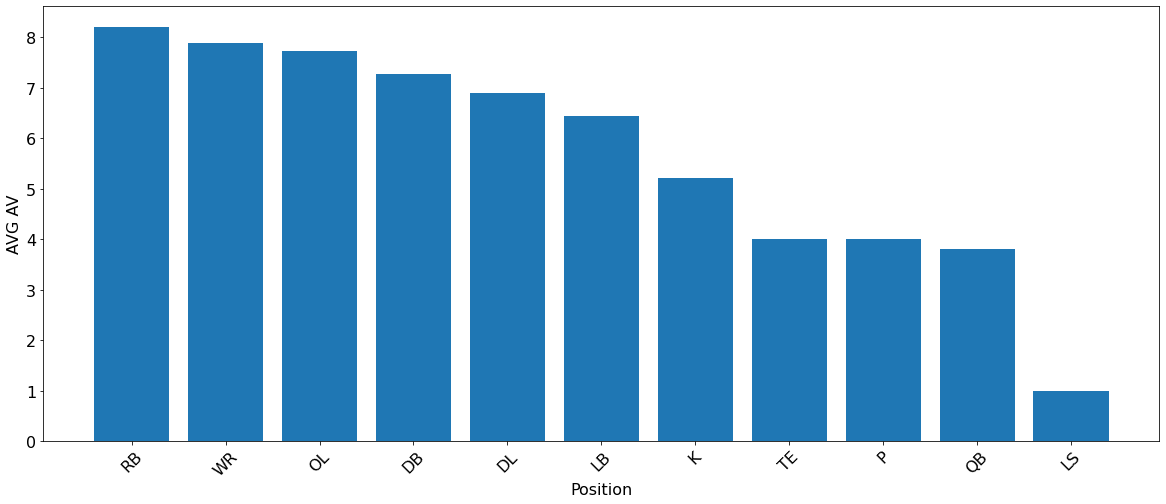

In [104]:
plt.bar(udfa_salary_df.Pos, udfa_salary_df.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Position', fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.show()

labels = udfa_salary_df.Pos
yay = udfa_gntd.avg_av
shoot = udfa_no_gntd.avg_av

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yay, width, label='Guarantee')
rects2 = ax.bar(x + width/2, shoot, width, label='No Guarantee')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AVG AV')
ax.set_title('AVG AV by Guaranteed Money')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [69]:
udfa_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5257,A.J. Green,GreeAJ00,2020,2021,2,DB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
2747,A.J. Moore,MoorA.00,2018,2021,4,DB,23,1.0,5.0,1.250000,2018,3,1710000.0,570000.0,3000.0,0.3,2009153.0,669718.0,3525.0
4514,Aaron Crawford,CrawAa00,2020,2020,1,DL,23,0.0,0.0,0.000000,2020,3,2287500.0,762500.0,8500.0,0.4,2402914.0,800971.0,8929.0
5085,Aaron Fuller,FullAa01,2021,2021,1,WR,24,0.0,0.0,0.000000,2020,3,2292500.0,764167.0,7500.0,0.4,2408166.0,802722.0,7878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,Zach Zenner,ZennZa00,2015,2019,5,RB,24,0.0,6.0,1.200000,2015,3,1580000.0,526667.0,5000.0,0.4,2295896.0,765299.0,7265.0
5181,Zack Golditch,GoldZa00,2018,2018,1,OL,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,OL,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0


In [70]:
udfa_gntd = udfa_gntd.dropna()
udfa_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
3990,A.J. Bouye,BouyA.00,2013,2021,9,DB,22,0.0,37.0,4.111111,2013,3,1490000.0,496667.0,5000.0,0.4,2522098.0,840700.0,8463.0
5257,A.J. Green,GreeAJ00,2020,2021,2,DB,22,0.0,1.0,0.500000,2020,3,2300000.0,766667.0,145000.0,0.4,2416044.0,805348.0,152316.0
2747,A.J. Moore,MoorA.00,2018,2021,4,DB,23,1.0,5.0,1.250000,2018,3,1710000.0,570000.0,3000.0,0.3,2009153.0,669718.0,3525.0
4514,Aaron Crawford,CrawAa00,2020,2020,1,DL,23,0.0,0.0,0.000000,2020,3,2287500.0,762500.0,8500.0,0.4,2402914.0,800971.0,8929.0
5085,Aaron Fuller,FullAa01,2021,2021,1,WR,24,0.0,0.0,0.000000,2020,3,2292500.0,764167.0,7500.0,0.4,2408166.0,802722.0,7878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,Zach Zenner,ZennZa00,2015,2019,5,RB,24,0.0,6.0,1.200000,2015,3,1580000.0,526667.0,5000.0,0.4,2295896.0,765299.0,7265.0
5181,Zack Golditch,GoldZa00,2018,2018,1,OL,23,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8722,Zack Williams,WillZa01,2012,2012,1,OL,24,0.0,0.0,0.000000,2011,4,2118680.0,529670.0,78680.0,0.4,3664458.0,916115.0,136085.0
3641,Zayne Anderson,AndeZa02,2021,2021,1,LB,25,0.0,0.0,0.000000,2021,3,2435000.0,811667.0,10000.0,0.4,2777901.0,925968.0,11408.0


In [71]:
udfa_gntd = udfa_gntd.sort_values('avg_av', ascending = False)
udfa_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
215,Austin Ekeler,EkelAu00,2017,2021,5,RB,22,4.0,41.0,8.200000,2017,3,1670000.0,556667.0,5000.0,0.3,2082000.0,694000.0,6234.0
22,Doug Baldwin,BaldDo00,2011,2018,8,WR,23,7.0,63.0,7.875000,2011,3,1412500.0,470833.0,17500.0,0.4,2443053.0,814350.0,30268.0
16,Terence Steele,SteeTe01,2020,2021,2,OL,23,8.0,15.0,7.500000,2020,3,2295000.0,765000.0,135000.0,0.4,2410792.0,803597.0,141811.0
829,Chris Harris Jr.,HarrCh01,2011,2021,11,DB,22,2.0,80.0,7.272727,2011,3,1397000.0,465667.0,2000.0,0.4,2416244.0,805415.0,3459.0
5400,Damon Harrison,HarrDa03,2012,2020,9,DL,24,0.0,62.0,6.888889,2012,3,1447000.0,482333.0,7000.0,0.4,2498055.0,832684.0,12085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,Jake Bargas,BargJa00,2020,2021,2,RB,24,0.0,0.0,0.000000,2020,3,2295000.0,765000.0,30000.0,0.4,2410792.0,803597.0,31514.0
7420,C.J. Reavis,ReavC.00,2018,2018,1,DB,23,0.0,0.0,0.000000,2018,3,1715000.0,571667.0,10000.0,0.3,2015028.0,671676.0,11749.0
8867,David Blough,BlouDa00,2019,2021,3,QB,24,-1.0,-1.0,-0.333333,2019,3.0,1775000.0,591667.0,80000.0,0.3,1963629.0,654543.0,88502.0
8875,Kaare Vedvik,VedvKa00,2019,2019,1,P,25,-1.0,-1.0,-1.000000,2018,3,1714000.0,571333.0,4000.0,0.3,2013853.0,671284.0,4700.0


In [72]:
udfa_no_gntd = udfa_no_gntd.dropna()
udfa_no_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
5062,A.J. Francis,FranA.00,2015,2017,3,DL,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
1057,A.J. Tarpley,TarpA.00,2015,2015,1,LB,23,2.0,2.0,2.000000,2015,3,1575000.0,525000.0,0.0,0.4,2288631.0,762877.0,0.0
1349,Aaron Berry,BerrAa00,2010,2014,5,DB,22,1.0,3.0,0.600000,0,1,570000.0,570000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,Zach Minter,MintZa00,2013,2013,1,DL,23,0.0,0.0,0.000000,0,2,1080000.0,540000.0,0.0,0.0,0.0,0.0,0.0
3134,Zach Sterup,SterZa00,2017,2018,2,OL,25,1.0,2.0,1.000000,2017,2,1020000.0,510000.0,0.0,0.3,1271641.0,635820.0,0.0
8061,Zach Sudfeld,SudfZa00,2013,2014,2,TE,24,0.0,1.0,0.500000,2016,1,600000.0,600000.0,0.0,0.4,804534.0,804534.0,0.0
3292,Zach Triner,TrinZa00,2019,2021,3,OL,28,1.0,3.0,1.000000,2017,3,1665000.0,555000.0,0.0,0.3,2075766.0,691922.0,0.0


In [73]:
udfa_gntd = udfa_gntd.fillna(0)
udfa_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
215,Austin Ekeler,EkelAu00,2017,2021,5,RB,22,4.0,41.0,8.200000,2017,3,1670000.0,556667.0,5000.0,0.3,2082000.0,694000.0,6234.0
22,Doug Baldwin,BaldDo00,2011,2018,8,WR,23,7.0,63.0,7.875000,2011,3,1412500.0,470833.0,17500.0,0.4,2443053.0,814350.0,30268.0
16,Terence Steele,SteeTe01,2020,2021,2,OL,23,8.0,15.0,7.500000,2020,3,2295000.0,765000.0,135000.0,0.4,2410792.0,803597.0,141811.0
829,Chris Harris Jr.,HarrCh01,2011,2021,11,DB,22,2.0,80.0,7.272727,2011,3,1397000.0,465667.0,2000.0,0.4,2416244.0,805415.0,3459.0
5400,Damon Harrison,HarrDa03,2012,2020,9,DL,24,0.0,62.0,6.888889,2012,3,1447000.0,482333.0,7000.0,0.4,2498055.0,832684.0,12085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,Jake Bargas,BargJa00,2020,2021,2,RB,24,0.0,0.0,0.000000,2020,3,2295000.0,765000.0,30000.0,0.4,2410792.0,803597.0,31514.0
7420,C.J. Reavis,ReavC.00,2018,2018,1,DB,23,0.0,0.0,0.000000,2018,3,1715000.0,571667.0,10000.0,0.3,2015028.0,671676.0,11749.0
8867,David Blough,BlouDa00,2019,2021,3,QB,24,-1.0,-1.0,-0.333333,2019,3.0,1775000.0,591667.0,80000.0,0.3,1963629.0,654543.0,88502.0
8875,Kaare Vedvik,VedvKa00,2019,2019,1,P,25,-1.0,-1.0,-1.000000,2018,3,1714000.0,571333.0,4000.0,0.3,2013853.0,671284.0,4700.0


In [74]:
udfa_no_gntd = udfa_no_gntd.fillna(0)
udfa_no_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
5062,A.J. Francis,FranA.00,2015,2017,3,DL,25,0.0,1.0,0.333333,2017,2,1320000.0,660000.0,0.0,0.4,1645653.0,822826.0,0.0
5507,A.J. Hendy,HendA.00,2016,2016,1,DB,23,0.0,0.0,0.000000,2016,3,1470000.0,490000.0,0.0,0.3,1971108.0,657036.0,0.0
5899,A.J. Jefferson,JeffA.00,2010,2013,4,DB,22,0.0,8.0,2.000000,0,1,730000.0,730000.0,0.0,0.0,0.0,0.0,0.0
1057,A.J. Tarpley,TarpA.00,2015,2015,1,LB,23,2.0,2.0,2.000000,2015,3,1575000.0,525000.0,0.0,0.4,2288631.0,762877.0,0.0
1349,Aaron Berry,BerrAa00,2010,2014,5,DB,22,1.0,3.0,0.600000,0,1,570000.0,570000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,Zach Minter,MintZa00,2013,2013,1,DL,23,0.0,0.0,0.000000,0,2,1080000.0,540000.0,0.0,0.0,0.0,0.0,0.0
3134,Zach Sterup,SterZa00,2017,2018,2,OL,25,1.0,2.0,1.000000,2017,2,1020000.0,510000.0,0.0,0.3,1271641.0,635820.0,0.0
8061,Zach Sudfeld,SudfZa00,2013,2014,2,TE,24,0.0,1.0,0.500000,2016,1,600000.0,600000.0,0.0,0.4,804534.0,804534.0,0.0
3292,Zach Triner,TrinZa00,2019,2021,3,OL,28,1.0,3.0,1.000000,2017,3,1665000.0,555000.0,0.0,0.3,2075766.0,691922.0,0.0


In [75]:
udfa_no_gntd = udfa_no_gntd.sort_values('avg_av', ascending = False)

In [76]:
udfa_gntd = udfa_gntd[udfa_gntd['avg_av'] >= 0]
udfa_gntd

,Name,ID,Year1,Yr_End,years,Pos,Age,AV_Rookie,AV_Career,avg_av,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
215,Austin Ekeler,EkelAu00,2017,2021,5,RB,22,4.0,41.0,8.200000,2017,3,1670000.0,556667.0,5000.0,0.3,2082000.0,694000.0,6234.0
22,Doug Baldwin,BaldDo00,2011,2018,8,WR,23,7.0,63.0,7.875000,2011,3,1412500.0,470833.0,17500.0,0.4,2443053.0,814350.0,30268.0
16,Terence Steele,SteeTe01,2020,2021,2,OL,23,8.0,15.0,7.500000,2020,3,2295000.0,765000.0,135000.0,0.4,2410792.0,803597.0,141811.0
829,Chris Harris Jr.,HarrCh01,2011,2021,11,DB,22,2.0,80.0,7.272727,2011,3,1397000.0,465667.0,2000.0,0.4,2416244.0,805415.0,3459.0
5400,Damon Harrison,HarrDa03,2012,2020,9,DL,24,0.0,62.0,6.888889,2012,3,1447000.0,482333.0,7000.0,0.4,2498055.0,832684.0,12085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,Buddy Howell,HoweGr00,2018,2021,4,RB,22,0.0,0.0,0.000000,2018,3,1717500.0,572500.0,7500.0,0.3,2017966.0,672655.0,8812.0
6033,Michael Joseph,JoseMi00,2021,2021,1,DB,26,0.0,0.0,0.000000,2018,3,1720000.0,573333.0,10000.0,0.3,2020903.0,673634.0,11749.0
8053,Jack Stoll,StolJa00,2021,2021,1,TE,23,0.0,0.0,0.000000,2021,3,2447500.0,815833.0,122500.0,0.4,2792162.0,930720.0,139751.0
3725,Jake Bargas,BargJa00,2020,2021,2,RB,24,0.0,0.0,0.000000,2020,3,2295000.0,765000.0,30000.0,0.4,2410792.0,803597.0,31514.0


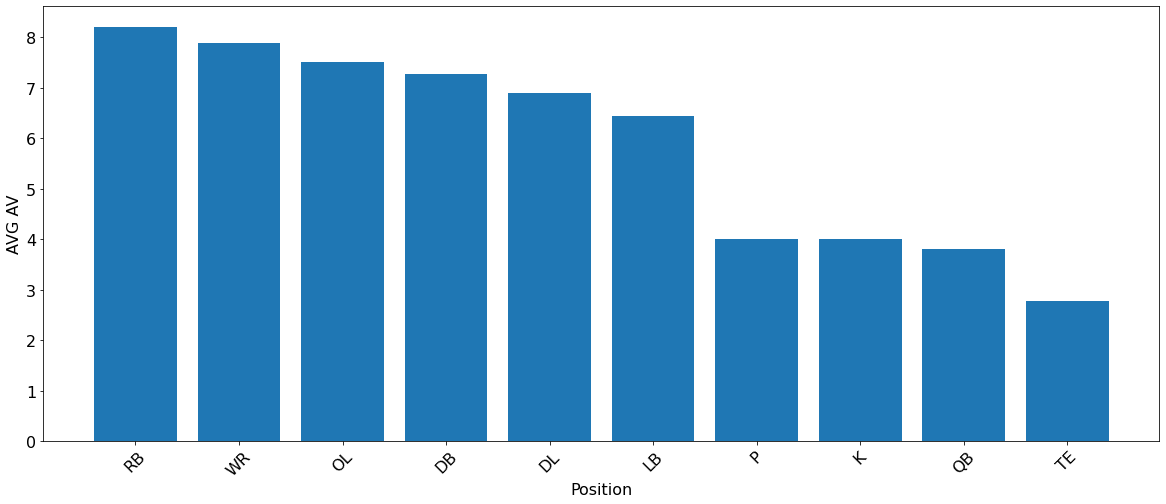

In [103]:
plt.bar(udfa_gntd.Pos, udfa_gntd.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Position', fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.show()

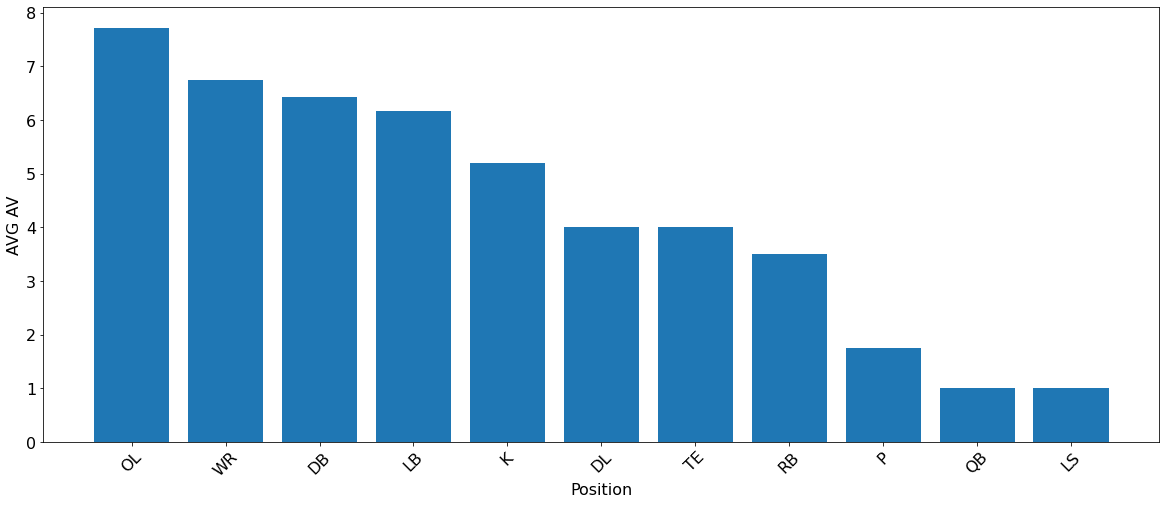

In [102]:
plt.bar(udfa_no_gntd.Pos, udfa_no_gntd.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Position', fontsize = 16)
plt.show()

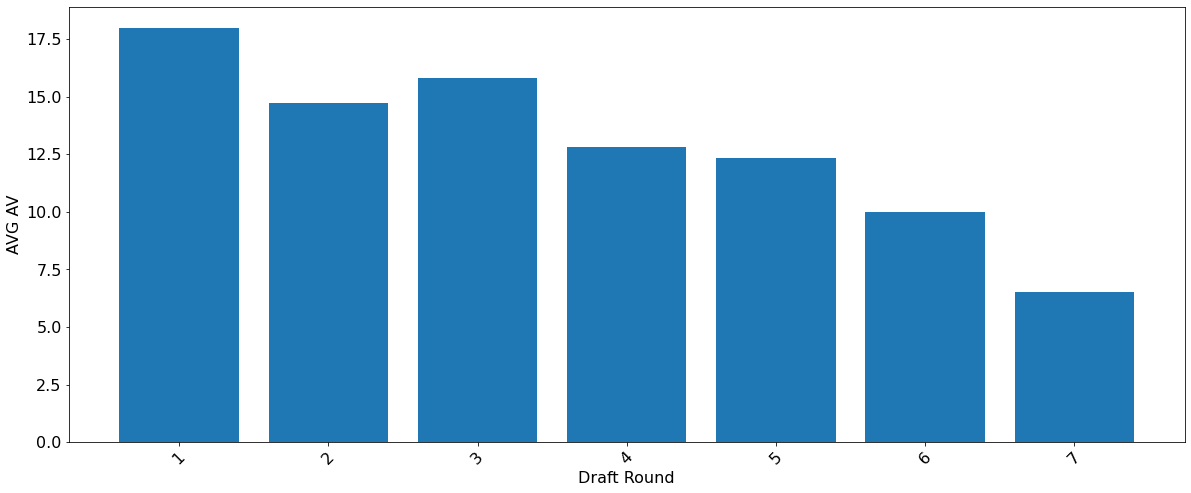

In [98]:
plt.bar(drafted_av_df.Rnd, drafted_av_df.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Draft Round', fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.show()

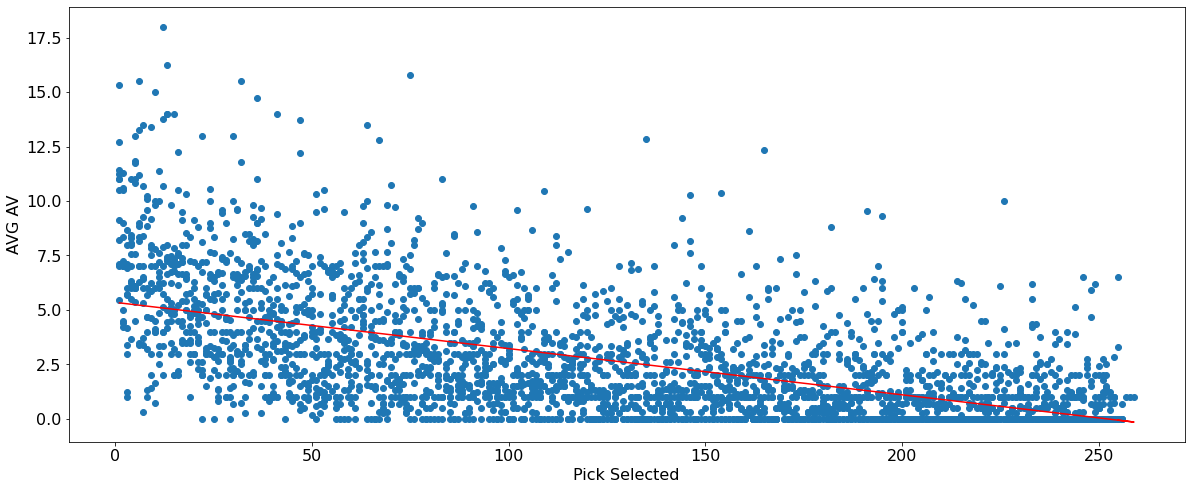

In [100]:
import seaborn as sns

#sns.regplot(x='Pick', y='avg_av', data = drafted_av_df)

#plt.scatter(drafted_av_df.Pick, drafted_av_df.avg_av)
#plt.ylabel('AVG AV')
#plt.xlabel('Pick Selected')
#plt.show()

x = drafted_av_df['Pick']
y = drafted_av_df['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

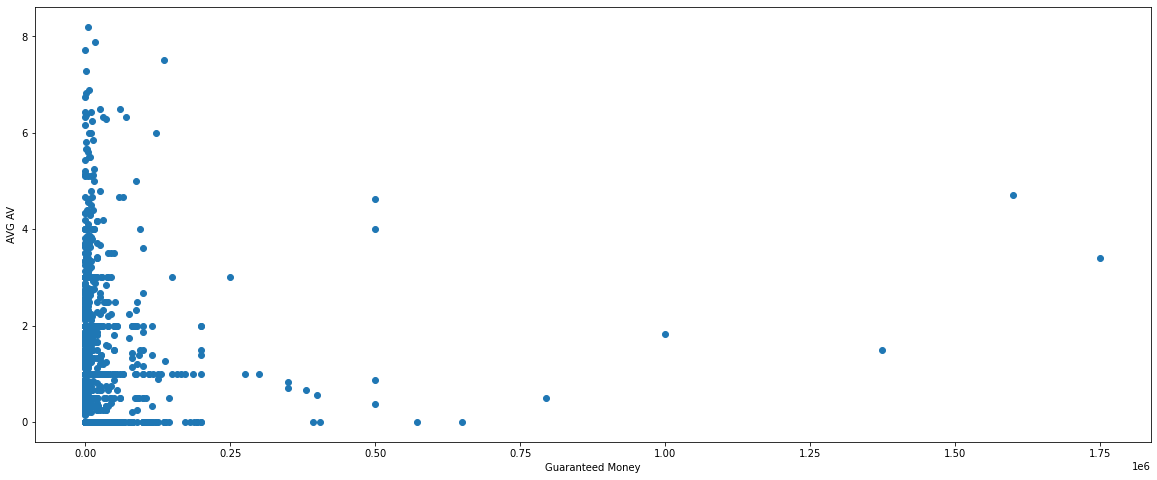

In [81]:
plt.scatter(udfa_salary_df.Guaranteed, udfa_salary_df.avg_av)
plt.ylabel('AVG AV')
plt.xlabel('Guaranteed Money')
plt.show()

In [82]:
dr_7_rnd = drafted_av_df[drafted_av_df.Rnd == 7]
dr_7_rnd

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd,years,avg_av
228,Mike Strachan,StraMi03,WR,24.0,Charleston (WV),IND,2021,7,229,2021,2021,0.0,0.0,6.0,0,0,1,0.00
229,Jimmy Morrissey,MorrJi00,OL,23.0,Pittsburgh,LVR,2021,7,230,2021,2021,1.0,1.0,5.0,4,0,1,1.00
230,Larnel Coleman,ColeLa03,OL,23.0,Massachusetts,MIA,2021,7,231,2021,2021,NaN,NaN,NaN,NaN,0,1,0.00
231,Phil Hoskins,HoskPh00,DL,24.0,Kentucky,CAR,2021,7,232,2021,2021,0.0,0.0,3.0,0,0,1,0.00
232,Jake Funk,FunkJa00,RB,23.0,Maryland,LAR,2021,7,233,2021,2021,0.0,0.0,10.0,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1,5,2.00
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0,4,1.25
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1,5,0.40
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0,4,0.75


In [83]:
dr_1_rnd = drafted_av_df[drafted_av_df.Rnd == 1]
dr_2_rnd = drafted_av_df[drafted_av_df.Rnd == 2]
dr_3_rnd = drafted_av_df[drafted_av_df.Rnd == 3]
dr_4_rnd = drafted_av_df[drafted_av_df.Rnd == 4]
dr_5_rnd = drafted_av_df[drafted_av_df.Rnd == 5]
dr_6_rnd = drafted_av_df[drafted_av_df.Rnd == 6]

In [84]:
dr_7_rnd = dr_7_rnd.sort_values('avg_av', ascending = False)
dr_6_rnd = dr_6_rnd.sort_values('avg_av', ascending = False)
dr_5_rnd = dr_5_rnd.sort_values('avg_av', ascending = False)

In [85]:
dr_late_rnds = drafted_av_df[(drafted_av_df['Rnd'] == 6) | (drafted_av_df['Rnd']==7)]
dr_late_rnds

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,Yr_To,AV_Rookie,AV_Career,G,GS,Yrs_Strtd,years,avg_av
184,Nick Niemann,NiemNi00,LB,23.0,Iowa,LAC,2021,6,185,2021,2021,1.0,1.0,17.0,0,0,1,1.00
185,Hamsah Nasirildeen,NasiHa00,DB,22.0,Florida St.,NYJ,2021,6,186,2021,2021,1.0,1.0,12.0,2,0,1,1.00
186,Frank Darby,DarbFr00,WR,23.0,Arizona St.,ATL,2021,6,187,2021,2021,0.0,0.0,10.0,0,0,1,0.00
187,Joshuah Bledsoe,BledJo00,DB,22.0,Missouri,NWE,2021,6,188,2021,2021,NaN,NaN,NaN,NaN,0,1,0.00
188,Marlon Tuipulotu,TuipMa00,DL,22.0,USC,PHI,2021,6,189,2021,2021,0.0,0.0,5.0,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Stevie Brown,BrowSt99,DB,23.0,Michigan,OAK,2010,7,251,2010,2014,10.0,10.0,55.0,20,1,5,2.00
3054,Austin Spitler,SpitAu99,LB,23.0,Ohio St.,MIA,2010,7,252,2010,2013,5.0,5.0,55.0,0,0,4,1.25
3055,Erik Lorig,LoriEr99,DL,23.0,Stanford,TAM,2010,7,253,2010,2014,2.0,2.0,66.0,30,1,5,0.40
3056,Josh Hull,HullJo99,LB,23.0,Penn St.,STL,2010,7,254,2010,2013,3.0,3.0,39.0,1,0,4,0.75


In [86]:
dr_late_rnds = dr_late_rnds.sort_values('avg_av', ascending = False)

In [87]:
#filepath = Path('late-rounds.csv')
#filepath.parent.mkdir(parents = True, exist_ok = True)
#udfa_salary_df.to_csv(filepath)

In [88]:
research = pd.merge(dr_late_rnds, udfa_salary_df, how = 'outer')
research.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 2622
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2623 non-null   object 
 1   ID                          2613 non-null   object 
 2   Pos                         2623 non-null   object 
 3   DrAge                       945 non-null    float64
 4   College                     955 non-null    object 
 5   Tm                          963 non-null    object 
 6   Year                        963 non-null    float64
 7   Rnd                         963 non-null    float64
 8   Pick                        963 non-null    float64
 9   Yr_From                     963 non-null    float64
 10  Yr_To                       963 non-null    float64
 11  AV_Rookie                   2446 non-null   float64
 12  AV_Career                   2446 non-null   float64
 13  G                           786 n

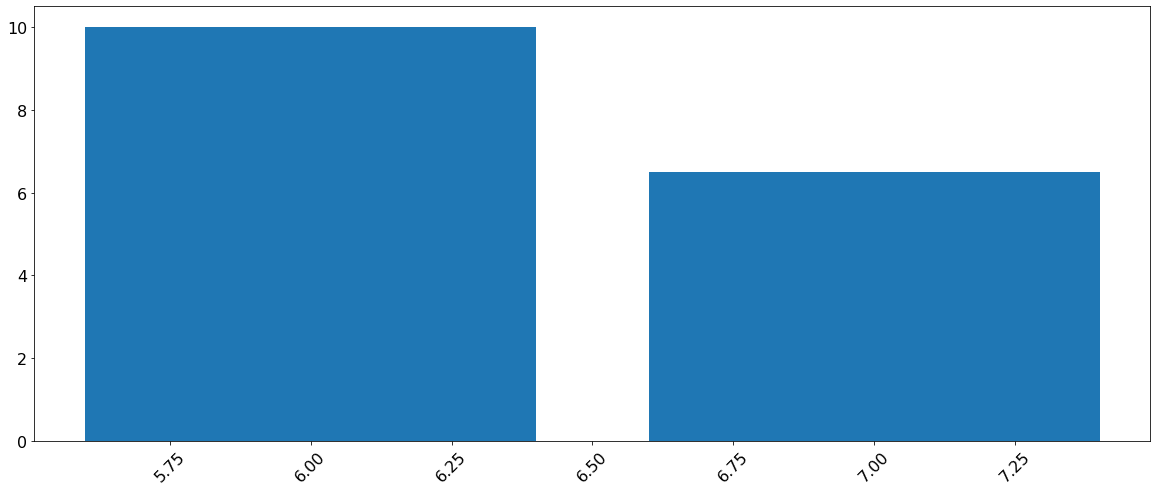

In [89]:
plt.bar(research.Rnd, research.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

In [90]:
research['Rnd'] = research['Rnd'].fillna(0)
research

,Name,ID,Pos,DrAge,College,Tm,Year,Rnd,Pick,Yr_From,...,Age,Yr_Signed,Years_y,Value,APY,Guaranteed,APY as % Of Cap At Signing,Inflated Value,Inflated APY,Inflated Guaranteed
0,Trey Smith,SmitTr05,OL,22.0,Tennessee,KAN,2021.0,6.0,226.0,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jason Kelce,KelcJa00,OL,23.0,Cincinnati,PHI,2011.0,6.0,191.0,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Antonio Brown,BrowAn04,WR,22.0,Central Michigan,PIT,2010.0,6.0,195.0,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Elijah Mitchell,MitcEl00,RB,23.0,Louisiana,SFO,2021.0,6.0,194.0,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Charles Leno Jr.,LenoCh00,OL,22.0,Boise St.,CHI,2014.0,7.0,246.0,2014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,LaRon Byrd,ByrdLa00,WR,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,23.0,2016.0,1,600000.0,600000.0,0.0,0.4,804534.0,804534.0,0.0
2619,Cole Luke,LukeCo00,DB,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,24.0,2017.0,3,1675000.0,558333.0,10000.0,0.3,2088234.0,696077.0,12467.0
2620,LaTroy Lewis,LewiLa01,LB,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,24.0,2017.0,3,1665000.0,555000.0,0.0,0.3,2075766.0,691922.0,0.0
2621,Cole Hikutini,HikuCo00,TE,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,23.0,2017.0,3,1665000.0,555000.0,110000.0,0.3,2075766.0,691922.0,137138.0


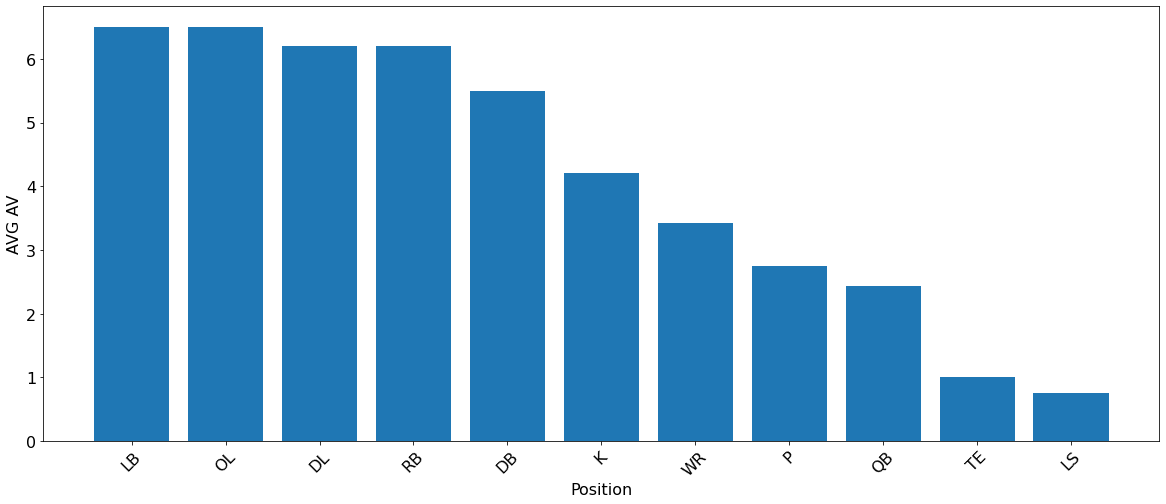

In [105]:
plt.bar(dr_7_rnd.Pos, dr_7_rnd.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Position', fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.show()

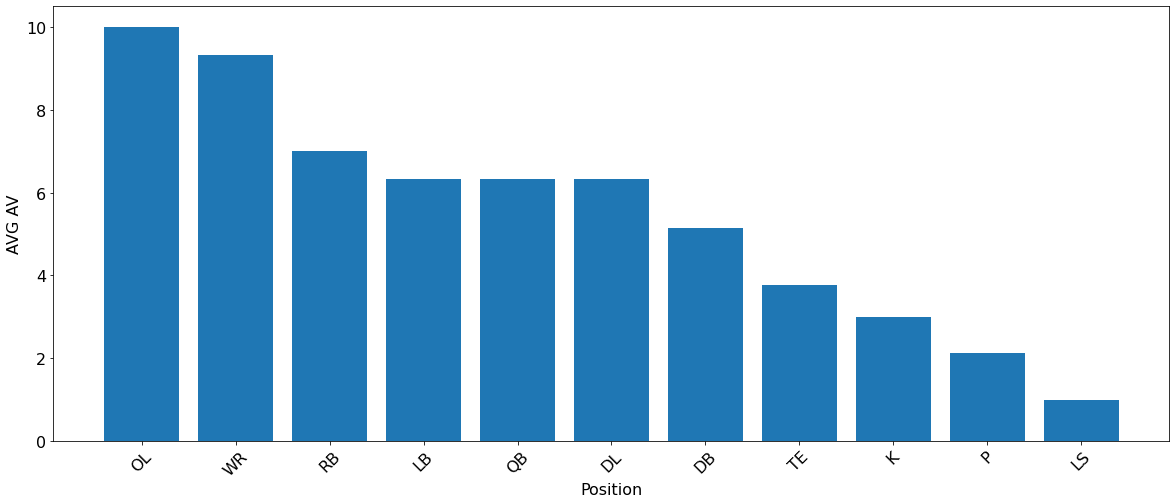

In [106]:
plt.bar(dr_6_rnd.Pos, dr_6_rnd.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Position', fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.show()

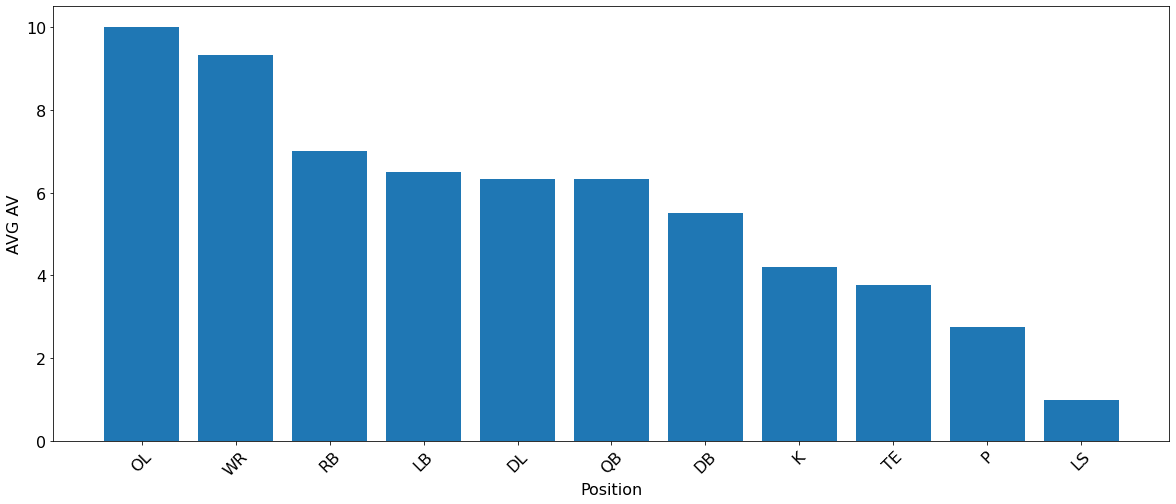

In [101]:
plt.bar(dr_late_rnds.Pos, dr_late_rnds.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Position', fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.show()

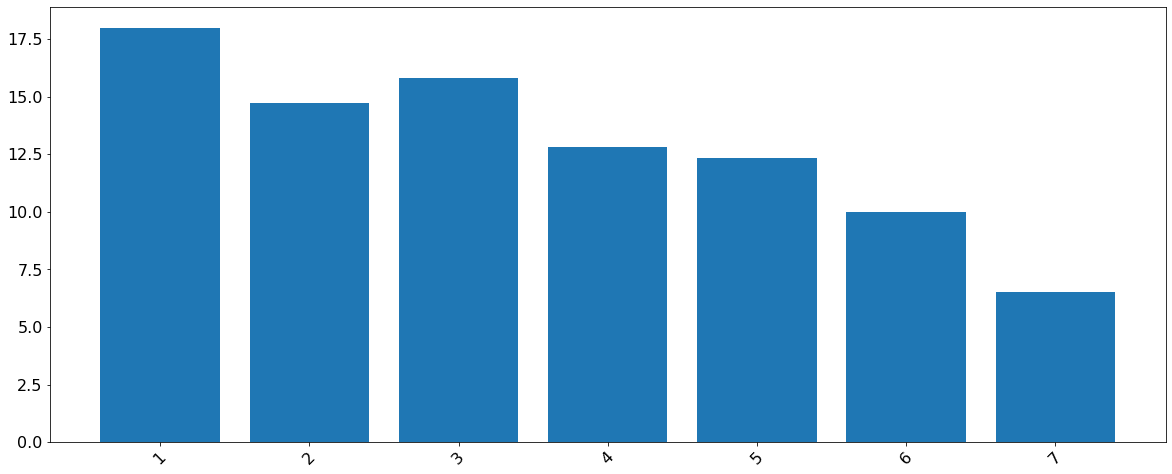

In [94]:
plt.bar(drafted_av_df.Rnd, drafted_av_df.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

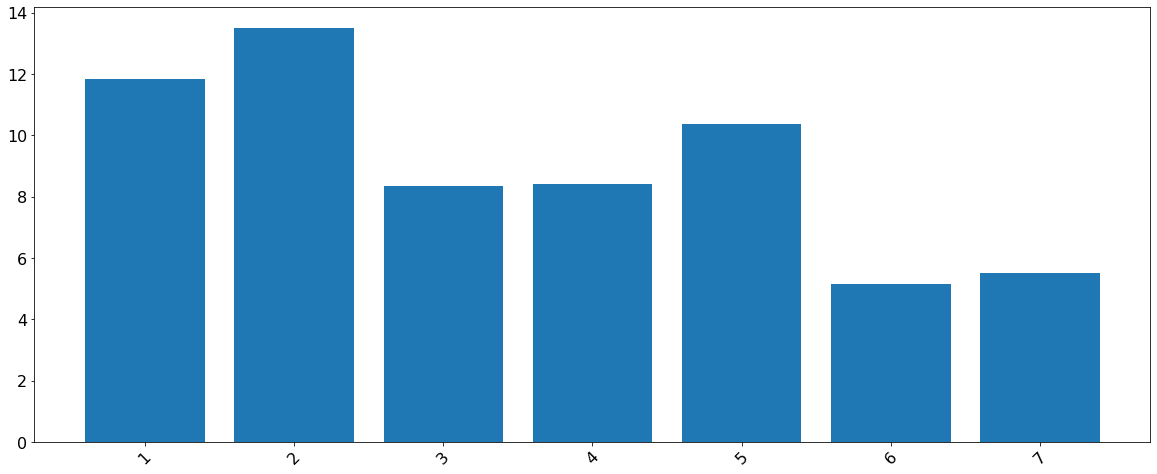

In [107]:
plt.bar(dr_db.Rnd, dr_db.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

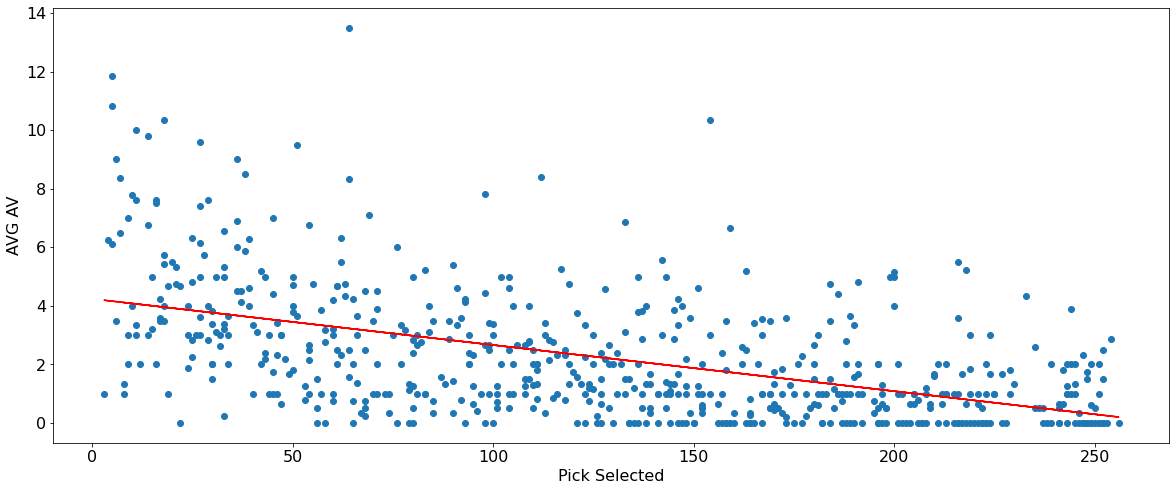

In [115]:
x = dr_db['Pick']
y = dr_db['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

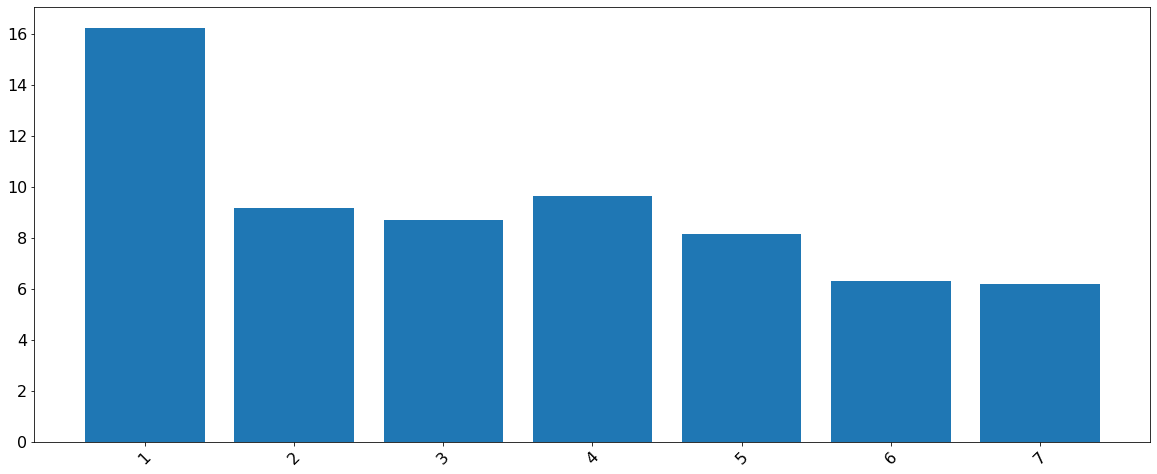

In [108]:
plt.bar(dr_dl.Rnd, dr_dl.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

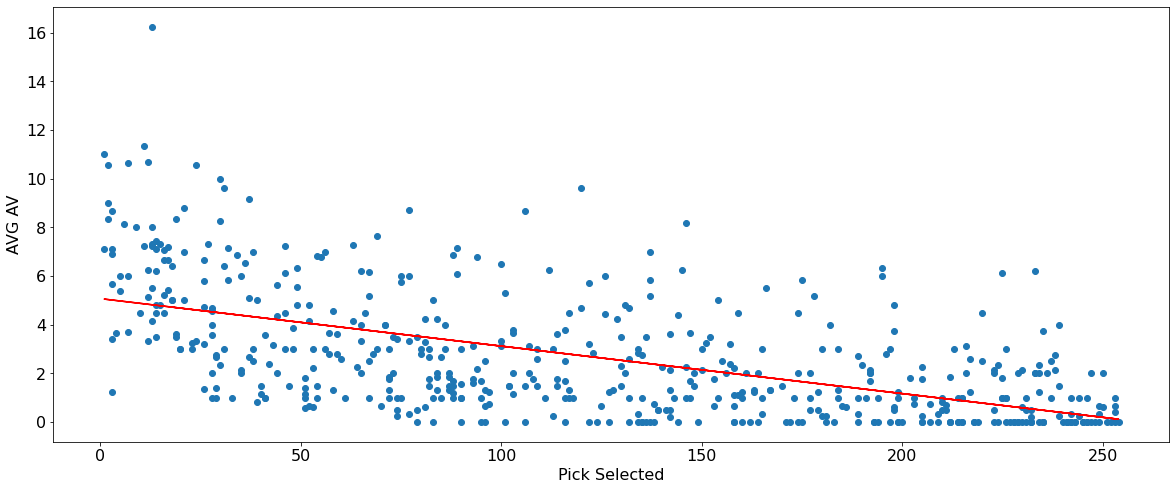

In [116]:
x = dr_dl['Pick']
y = dr_dl['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

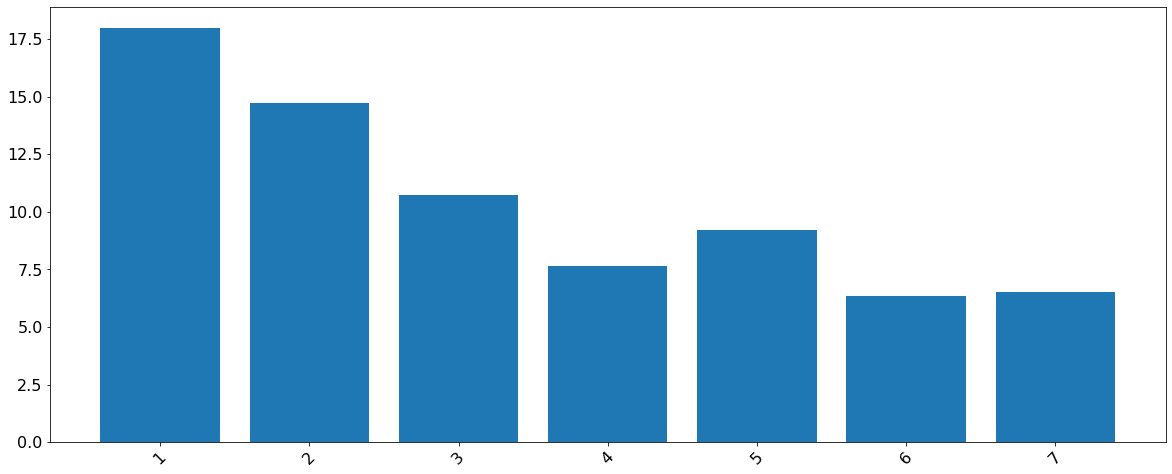

In [109]:
plt.bar(dr_lb.Rnd, dr_lb.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

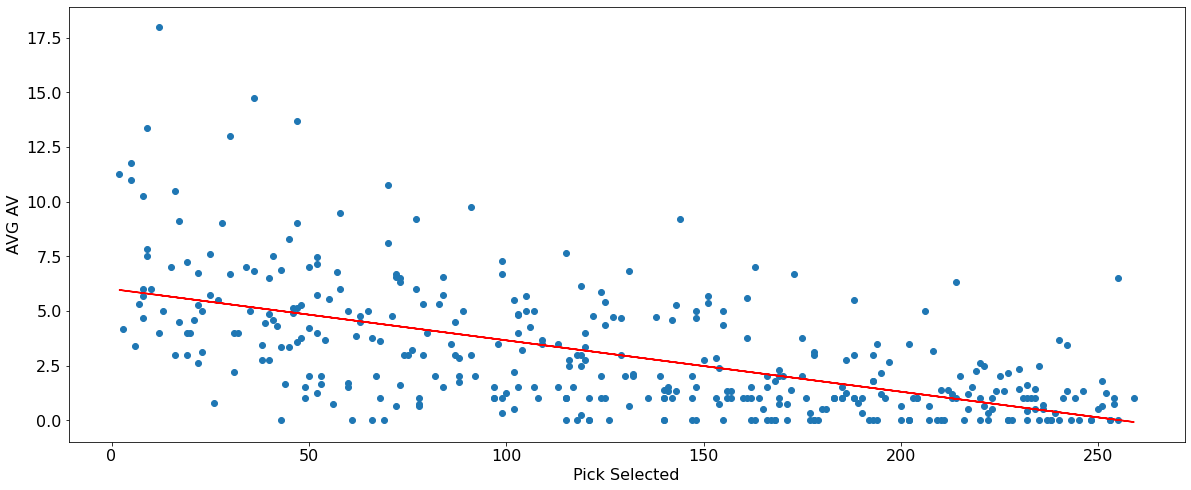

In [117]:
x = dr_lb['Pick']
y = dr_lb['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

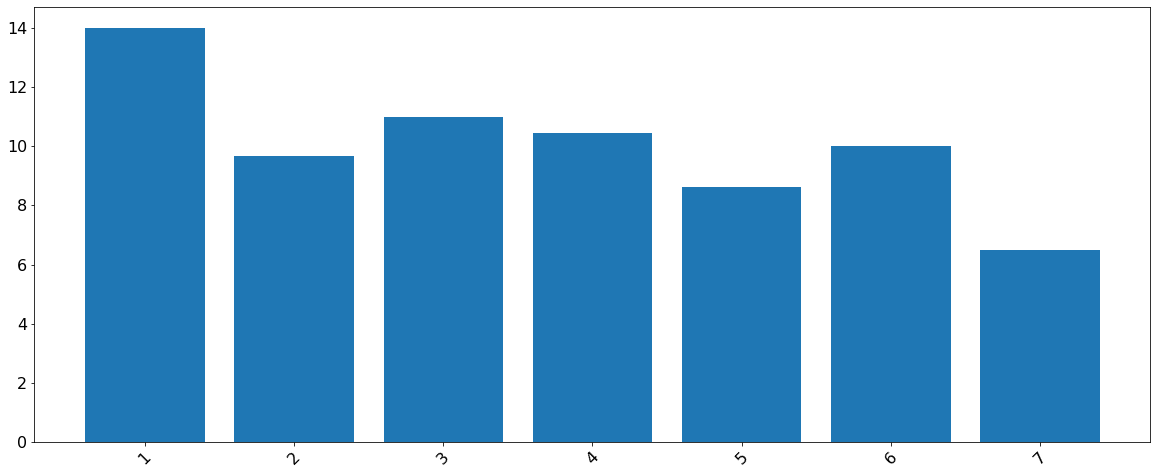

In [110]:
plt.bar(dr_ol.Rnd, dr_ol.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

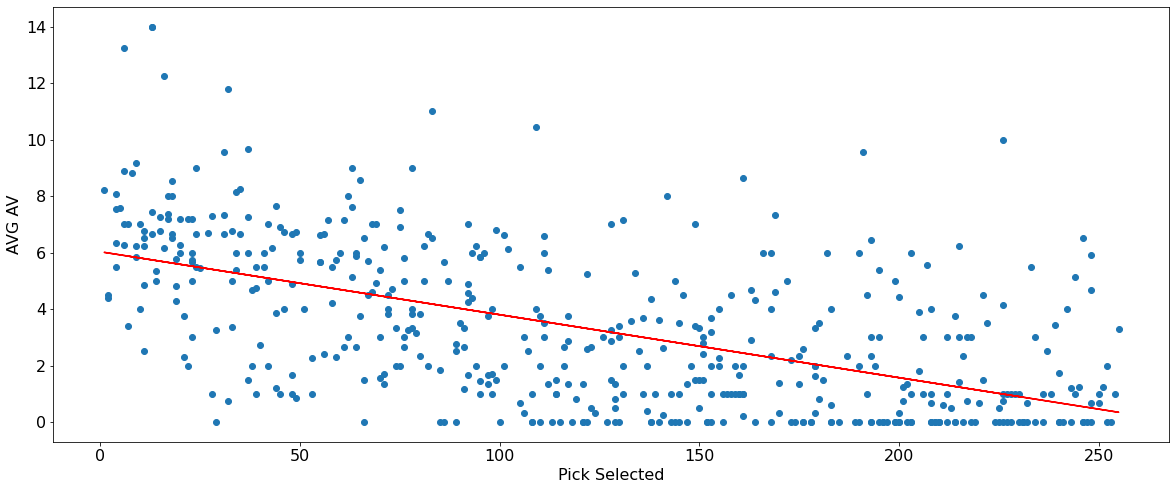

In [118]:
x = dr_ol['Pick']
y = dr_ol['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

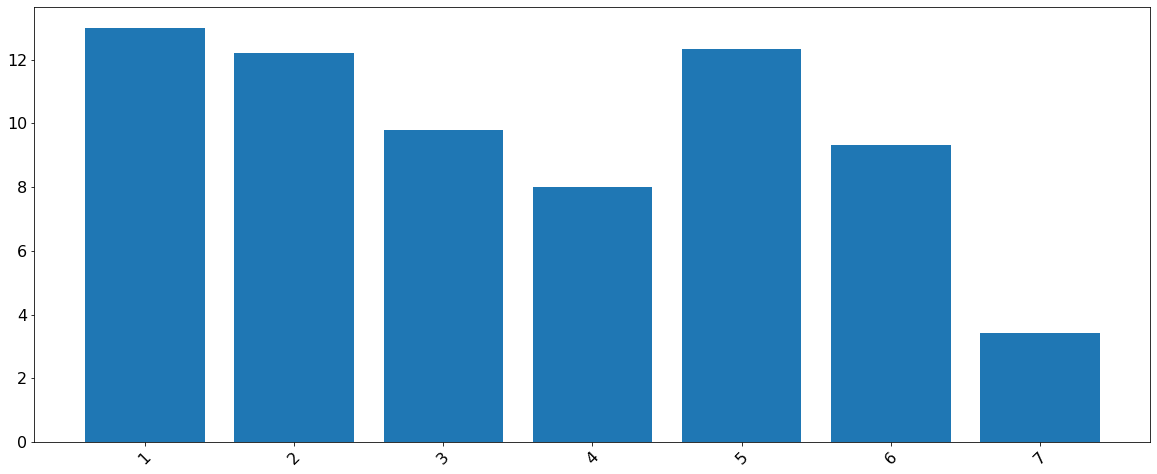

In [111]:
plt.bar(dr_wr.Rnd, dr_wr.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

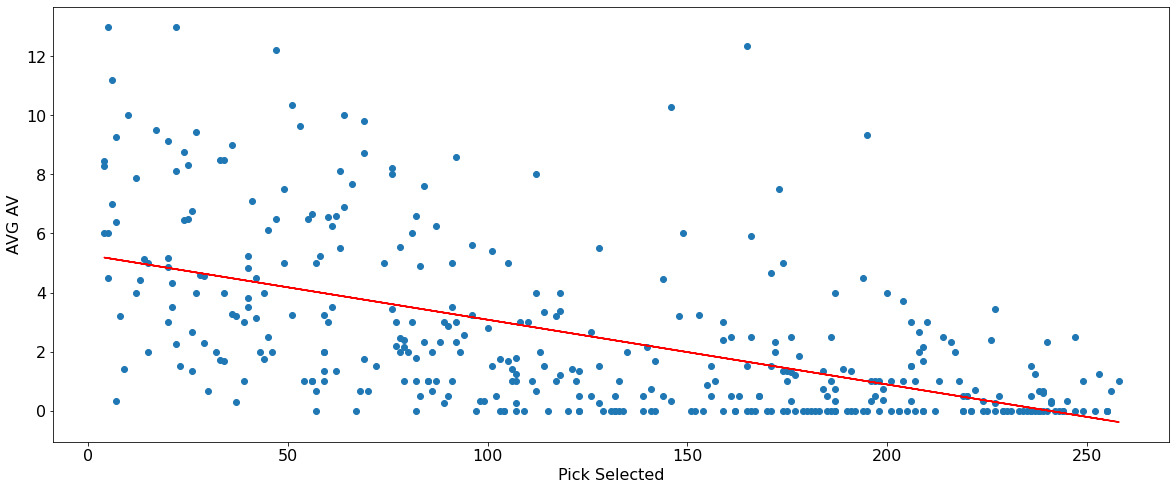

In [119]:
x = dr_wr['Pick']
y = dr_wr['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

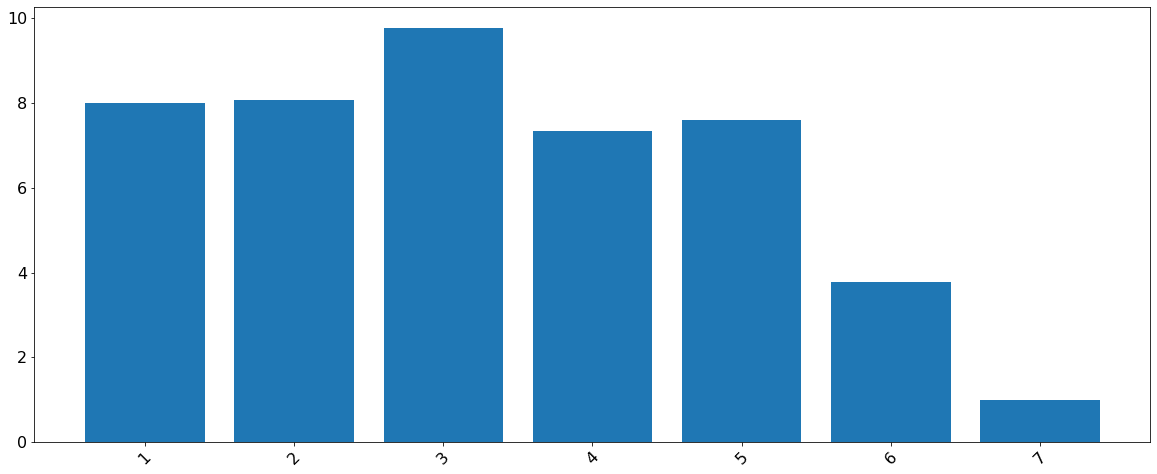

In [112]:
plt.bar(dr_te.Rnd, dr_te.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

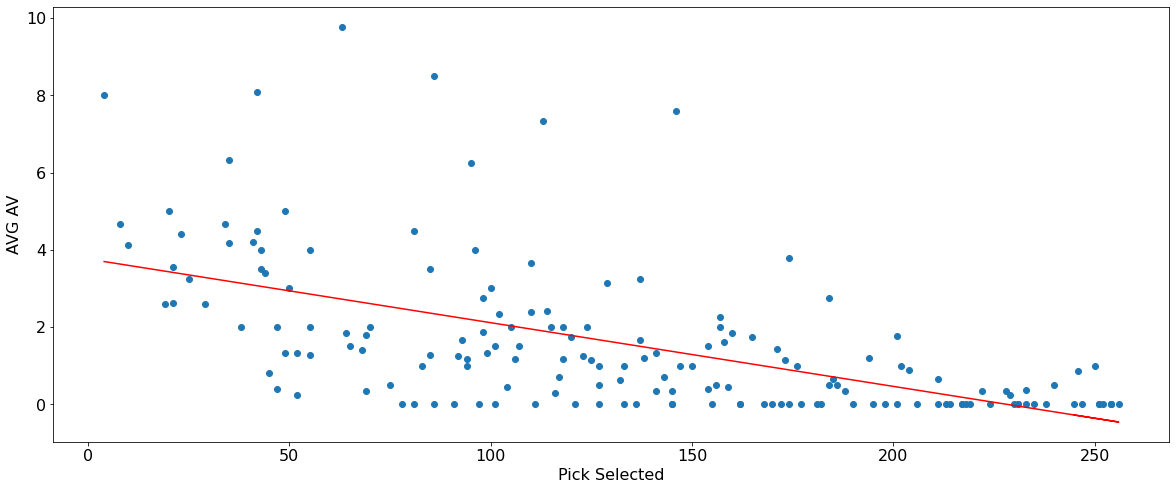

In [120]:
x = dr_te['Pick']
y = dr_te['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

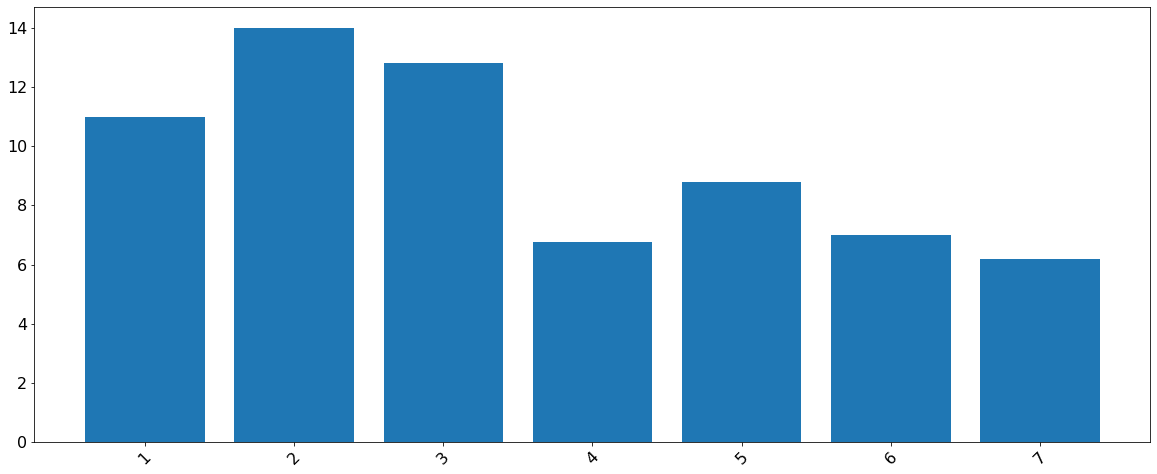

In [113]:
plt.bar(dr_rb.Rnd, dr_rb.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

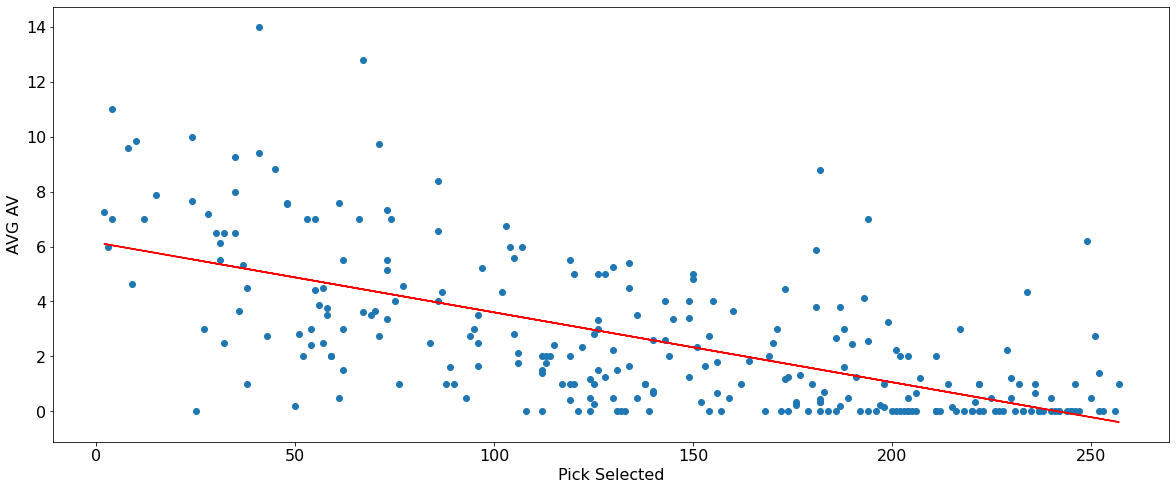

In [121]:
x = dr_rb['Pick']
y = dr_rb['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

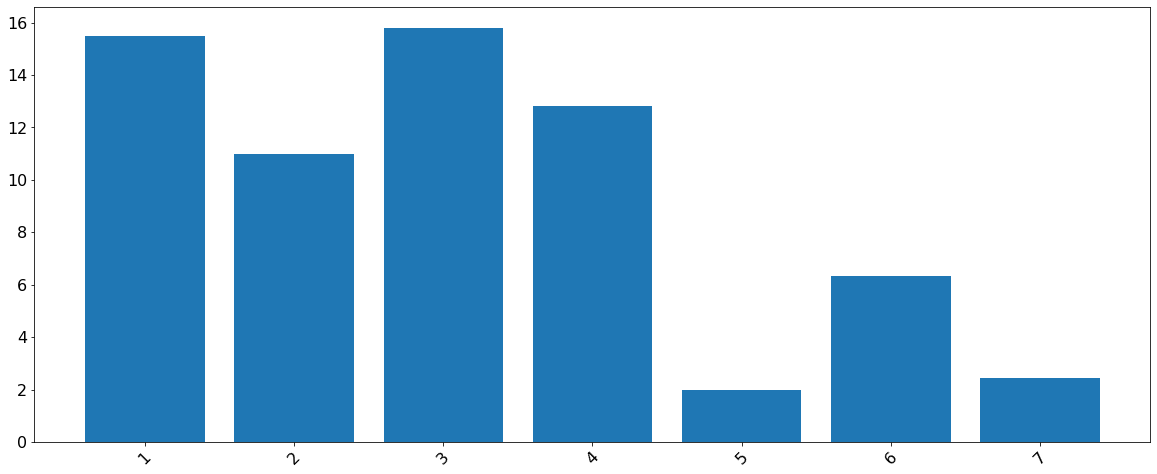

In [114]:
plt.bar(dr_qb.Rnd, dr_qb.avg_av)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

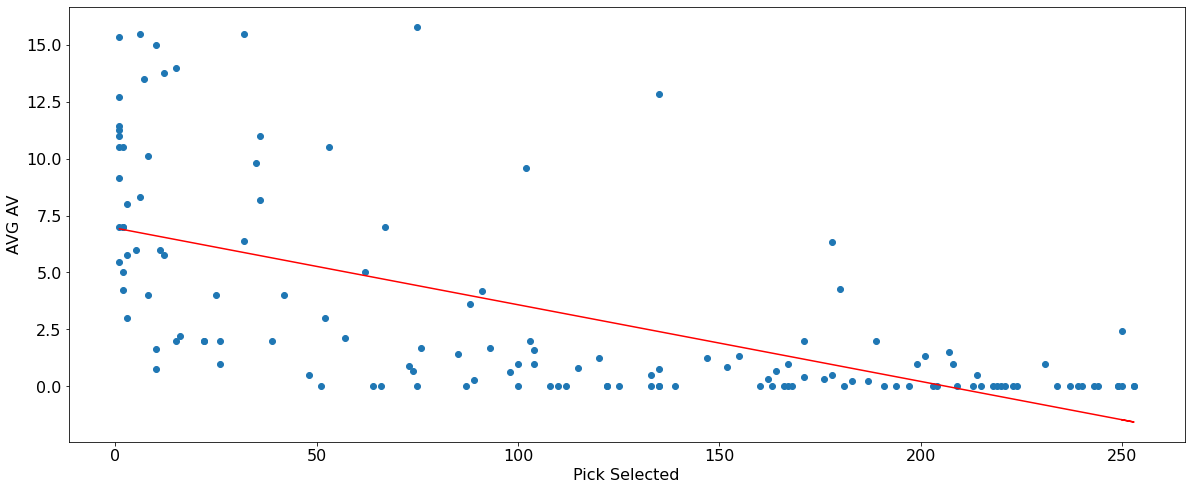

In [122]:
x = dr_qb['Pick']
y = dr_qb['avg_av']
plt.scatter(x, y)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('AVG AV', fontsize = 16)
plt.xlabel('Pick Selected', fontsize = 16)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r-')

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

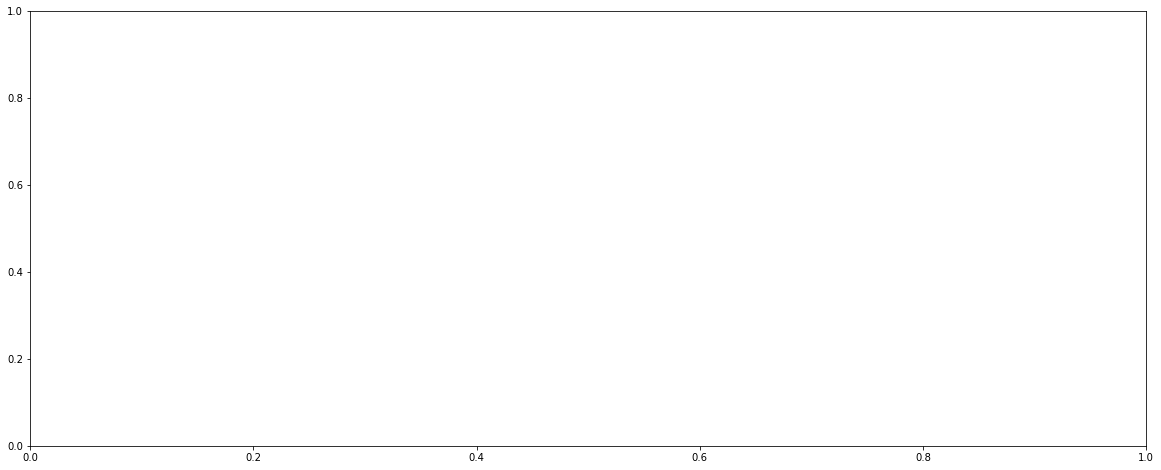

In [124]:
x1 = drafted_av_df.Pos
y1 = udfa_salary_df.avg_av
y2 = dr_6_rnd.avg_av
y3 = dr_7_rnd.avg_av
width = 0.2

plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x1)
plt.xlabel('Position')
plt.ylabel('AVG AV')
plt.legend(['UDFA', 'Round 6', 'Round 7'])
plt.show()